In [ ]:
# imports & downloads

! pip install feature_engine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import missingno as msno

from feature_engine.encoding import OrdinalEncoder
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

# **Adding the target column and merging files**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import high popularity songs
df_high = pd.read_csv('/content/drive/MyDrive/CMP6202/assessmentDataset/high_popularity_spotify_data.csv')

In [ ]:
df_high.shape

(1686, 29)

In [ ]:
df_high.columns

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')

In [ ]:
# add popularity column with value 'high'
df_high["popularity"] = "high"

In [ ]:
# check if popularity column has been added
df_high.columns

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id', 'popularity'],
      dtype='object')

In [ ]:
df_high.head()

energy    tempo  danceability playlist_genre  loudness  liveness  valence  \
0   0.592  157.969         0.521            pop    -7.777     0.122    0.535   
1   0.507  104.978         0.747            pop   -10.171     0.117    0.438   
2   0.808  108.548         0.554            pop    -4.169     0.159    0.372   
3   0.910  112.966         0.670            pop    -4.070     0.304    0.786   
4   0.783  149.027         0.777            pop    -4.477     0.355    0.939   

            track_artist  time_signature  speechiness  ...  \
0  Lady Gaga, Bruno Mars               3       0.0304  ...   
1          Billie Eilish               4       0.0358  ...   
2          Gracie Abrams               4       0.0368  ...   
3      Sabrina Carpenter               4       0.0634  ...   
4       ROSÉ, Bruno Mars               4       0.2600  ...   

           track_album_id mode key duration_ms acousticness  \
0  10FLjwfpbxLmW8c25Xyc2N    0   6      251668       0.3080   
1  7aJuG4TFXa2hmE4z1yxc3n    1   2      210373       0.2000   
2  0hBRqPYPXhr1RkTDG3n4Mk    1   1      166300       0.2140   
3  4B4Elma4nNDUyl6D5PvQkj    0   0      157280       0.0939   
4  2IYQwwgxgOIn7t3iF6ufFD    0   0      169917       0.0283   

                       id playlist_subgenre            type  \
0  2plbrEY59IikOBgBGLjaoe        mainstream  audio_features   
1  6dOtVTDdiauQNBQEDOtlAB        mainstream  audio_features   
2  7ne4VBA60CxGM75vw0EYad        mainstream  audio_features   
3  1d7Ptw3qYcfpdLNL5REhtJ        mainstream  audio_features   
4  5vNRhkKd0yEAg8suGBpjeY        mainstream  audio_features   

              playlist_id  popularity  
0  37i9dQZF1DXcBWIGoYBM5M        high  
1  37i9dQZF1DXcBWIGoYBM5M        high  
2  37i9dQZF1DXcBWIGoYBM5M        high  
3  37i9dQZF1DXcBWIGoYBM5M        high  
4  37i9dQZF1DXcBWIGoYBM5M        high  

[5 rows x 30 columns]

In [ ]:
# import low popularity songs
df_low = pd.read_csv('/content/drive/MyDrive/CMP6202/assessmentDataset/low_popularity_spotify_data.csv')

In [ ]:
df_low.shape

(3145, 29)

In [ ]:
df_low.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name'],
      dtype='object')

In [ ]:
# add popularity column with value 'low'
df_low["popularity"] = "low"

In [ ]:
# check if popularity column has been added
df_low.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name', 'popularity'],
      dtype='object')

In [ ]:
df_low.head()

time_signature  track_popularity  speechiness  danceability  playlist_name  \
0             4.0                23       0.0393         0.636  Rock Classics   
1             4.0                53       0.0317         0.572  Rock Classics   
2             4.0                55       0.0454         0.591  Rock Classics   
3             4.0                64       0.1010         0.443  Jazz Classics   
4             4.0                62       0.0298         0.685  Jazz Classics   

                       track_artist  duration_ms  energy playlist_genre  \
0      Creedence Clearwater Revival     138053.0   0.746           rock   
1                         Van Halen     241600.0   0.835           rock   
2                      Stevie Nicks     329413.0   0.804           rock   
3  Ella Fitzgerald, Louis Armstrong     185160.0   0.104           jazz   
4                    Galt MacDermot     205720.0   0.472           jazz   

  playlist_subgenre  ...             playlist_id                track_id  \
0           classic  ...  37i9dQZF1DWXRqgorJj26U  5e6x5YRnMJIKvYpZxLqdpH   
1           classic  ...  37i9dQZF1DWXRqgorJj26U  5FqYA8KfiwsQvyBI4IamnY   
2           classic  ...  37i9dQZF1DWXRqgorJj26U  5LNiqEqpDc8TuqPy79kDBu   
3           classic  ...  37i9dQZF1DXbITWG1ZJKYt  78MI7mu1LV1k4IA2HzKmHe   
4           classic  ...  37i9dQZF1DXbITWG1ZJKYt  6MN6yRVriszuyAVlyF8ndB   

   valence  key    tempo loudness acousticness liveness  \
0    0.432  0.0  132.310   -3.785       0.0648   0.1730   
1    0.795  0.0  129.981   -6.219       0.1710   0.0702   
2    0.658  0.0  111.457   -7.299       0.3270   0.0818   
3    0.394  0.0   76.474  -17.042       0.9130   0.1910   
4    0.475  9.0   80.487   -9.691       0.7850   0.2240   

                                    track_album_name popularity  
0  The Long Road Home - The Ultimate John Fogerty...        low  
1                                     The Collection        low  
2                       Bella Donna (Deluxe Edition)        low  
3                                         Love, Ella        low  
4                  Shapes of Rhythm/Woman Is Sweeter        low  

[5 rows x 30 columns]

In [ ]:
# merge csv files vertically (row-wise)
df_songs = pd.concat([df_low, df_high], axis=0, ignore_index=True)

In [ ]:
# checking if there are 'low' popularity songs
df_songs.head()

time_signature  track_popularity  speechiness  danceability  playlist_name  \
0             4.0                23       0.0393         0.636  Rock Classics   
1             4.0                53       0.0317         0.572  Rock Classics   
2             4.0                55       0.0454         0.591  Rock Classics   
3             4.0                64       0.1010         0.443  Jazz Classics   
4             4.0                62       0.0298         0.685  Jazz Classics   

                       track_artist  duration_ms  energy playlist_genre  \
0      Creedence Clearwater Revival     138053.0   0.746           rock   
1                         Van Halen     241600.0   0.835           rock   
2                      Stevie Nicks     329413.0   0.804           rock   
3  Ella Fitzgerald, Louis Armstrong     185160.0   0.104           jazz   
4                    Galt MacDermot     205720.0   0.472           jazz   

  playlist_subgenre  ...             playlist_id                track_id  \
0           classic  ...  37i9dQZF1DWXRqgorJj26U  5e6x5YRnMJIKvYpZxLqdpH   
1           classic  ...  37i9dQZF1DWXRqgorJj26U  5FqYA8KfiwsQvyBI4IamnY   
2           classic  ...  37i9dQZF1DWXRqgorJj26U  5LNiqEqpDc8TuqPy79kDBu   
3           classic  ...  37i9dQZF1DXbITWG1ZJKYt  78MI7mu1LV1k4IA2HzKmHe   
4           classic  ...  37i9dQZF1DXbITWG1ZJKYt  6MN6yRVriszuyAVlyF8ndB   

   valence  key    tempo loudness acousticness liveness  \
0    0.432  0.0  132.310   -3.785       0.0648   0.1730   
1    0.795  0.0  129.981   -6.219       0.1710   0.0702   
2    0.658  0.0  111.457   -7.299       0.3270   0.0818   
3    0.394  0.0   76.474  -17.042       0.9130   0.1910   
4    0.475  9.0   80.487   -9.691       0.7850   0.2240   

                                    track_album_name popularity  
0  The Long Road Home - The Ultimate John Fogerty...        low  
1                                     The Collection        low  
2                       Bella Donna (Deluxe Edition)        low  
3                                         Love, Ella        low  
4                  Shapes of Rhythm/Woman Is Sweeter        low  

[5 rows x 30 columns]

In [ ]:
# checking if there are 'high' popularity songs
df_songs.tail()

time_signature  track_popularity  speechiness  danceability  \
4826             5.0                76       0.0678         0.573   
4827             4.0                74       0.0941         0.711   
4828             4.0                69       0.0929         0.724   
4829             4.0                82       0.3400         0.463   
4830             4.0                69       0.1280         0.645   

         playlist_name               track_artist  duration_ms  energy  \
4826  Afro-Latin Party                   Libianca     184791.0   0.422   
4827  Afro-Latin Party                   Omah Lay     183057.0   0.725   
4828  Afro-Latin Party               Davido, FAVE     194040.0   0.809   
4829  Afro-Latin Party        Future, Drake, Tems     189893.0   0.642   
4830        Scandi Pop  Alan Walker, Ina Wroldsen     205087.0   0.890   

     playlist_genre playlist_subgenre  ...             playlist_id  \
4826          latin        afro-latin  ...  0oU30cCr8klmMsuOKHDLkh   
4827          latin        afro-latin  ...  0oU30cCr8klmMsuOKHDLkh   
4828          latin        afro-latin  ...  0oU30cCr8klmMsuOKHDLkh   
4829          latin        afro-latin  ...  0oU30cCr8klmMsuOKHDLkh   
4830            pop            scandi  ...  59z06GgF6TTDbm5cr1RZUC   

                    track_id  valence   key    tempo loudness acousticness  \
4826  26b3oVLrRUaaybJulow9kz    0.693  10.0  124.357   -7.621        0.551   
4827  1wADwLSkYhrSmy4vdy6BRn    0.530   3.0  105.016   -8.315        0.424   
4828  7vKXc90NT5WBm3UTT4iTVG    0.606   6.0   99.005   -5.022        0.182   
4829  59nOXPmaKlBfGMDeOVGrIK    0.339   1.0   83.389   -4.474        0.314   
4830  2GE3k8I0Sbh0puCjI15KGy    0.421   6.0  126.881   -4.985        0.259   

     liveness   track_album_name popularity  
4826   0.1020             People       high  
4827   0.1100          Boy Alone       high  
4828   0.0765           Timeless       high  
4829   0.0686  I NEVER LIKED YOU       high  
4830   0.3760          Barcelona       high  

[5 rows x 30 columns]

# **Quick look at the dataset**

In [ ]:
# how many records
len(df_songs)

4831

In [ ]:
# how many features present for each record?
len(df_songs.columns)

30

In [ ]:
# the above could be found out in one line of code
df_songs.shape

(4831, 30)

In [ ]:
# what values are present for these features?
df_songs.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name', 'popularity'],
      dtype='object')

# **Split dataset**



In [ ]:
# drop the target column
X = df_songs.drop(columns = ['popularity'])

In [ ]:
# make y the target
y = df_songs['popularity']

In [ ]:
# necessary imports
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# split for 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# check training dataset
X_train.shape

(3864, 29)

In [ ]:
# check testing dataset
X_test.shape

(967, 29)

# **Exploratory Data Analysis**

## **General data analysis**

In [ ]:
# making copies to avoid altering original data
eda_X_train = X_train.copy()
eda_y_train = y_train.copy()

In [ ]:
# merging copies to perform eda on the training set
eda_training = pd.concat([eda_X_train, eda_y_train], axis=1)

In [ ]:
# checking how many columns and rows in the training set
eda_training.shape

(3864, 30)

In [ ]:
# what are the data types of each feature?
eda_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3864 entries, 3649 to 860
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            3863 non-null   float64
 1   track_popularity          3864 non-null   int64  
 2   speechiness               3863 non-null   float64
 3   danceability              3863 non-null   float64
 4   playlist_name             3864 non-null   object 
 5   track_artist              3864 non-null   object 
 6   duration_ms               3863 non-null   float64
 7   energy                    3863 non-null   float64
 8   playlist_genre            3864 non-null   object 
 9   playlist_subgenre         3864 non-null   object 
 10  track_href                3863 non-null   object 
 11  track_name                3864 non-null   object 
 12  mode                      3863 non-null   float64
 13  uri                       3863 non-null   object 
 14  type       

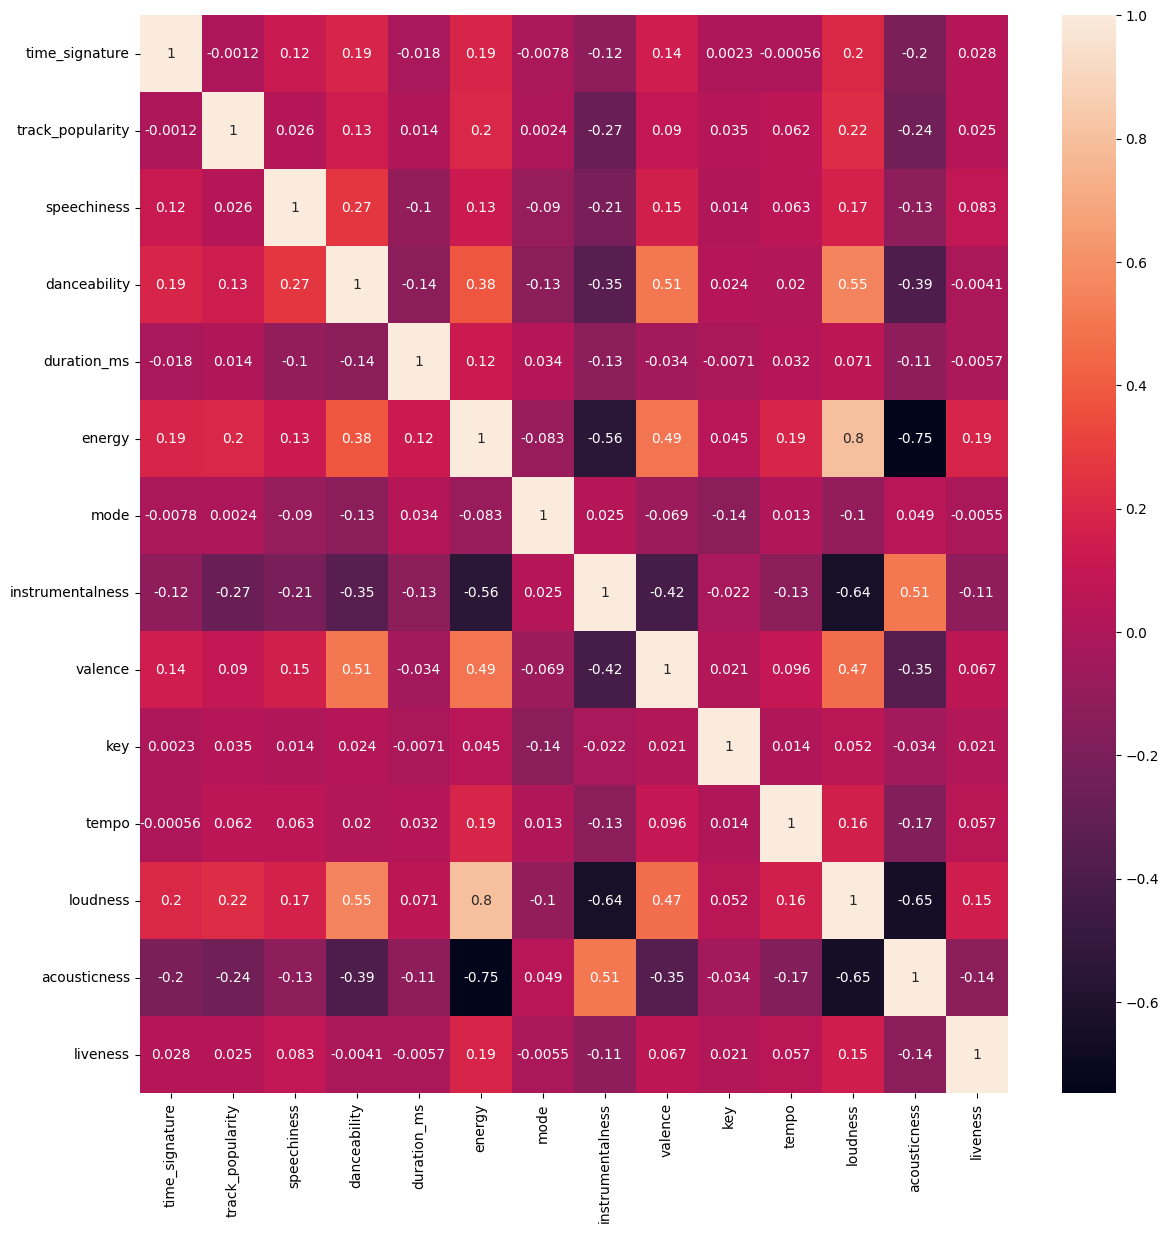

In [ ]:
# checking for any correlations between numerical features
numeric_df = eda_training.select_dtypes(include=[np.number]) # heatmaps don't work with non-numerical data
corr = numeric_df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)
plt.show()

## **Univariate analysis**

### **popularity**

In [ ]:
eda_training["popularity"].describe()

count     3864
unique       2
top        low
freq      2505
Name: popularity, dtype: object

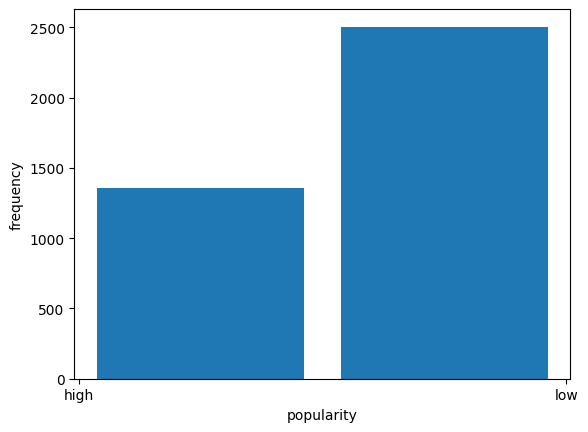

In [ ]:
plt.hist(x=eda_training["popularity"], bins=2, rwidth=0.85)
plt.xlabel('popularity',fontsize=10)
plt.ylabel('frequency',fontsize=10)
plt.show()

### **track_popularity**

In [ ]:
eda_training["track_popularity"].describe()

count    3864.000000
mean       54.808747
std        19.836124
min        11.000000
25%        40.750000
50%        56.000000
75%        72.000000
max       100.000000
Name: track_popularity, dtype: float64

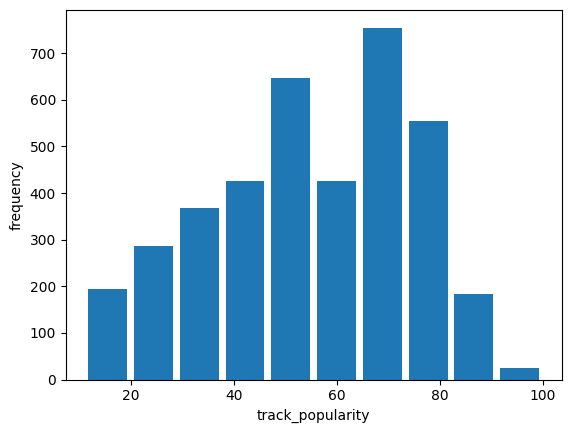

In [ ]:
plt.hist(x=eda_training["track_popularity"], bins=10, rwidth=0.85)
plt.xlabel('track_popularity', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.show()

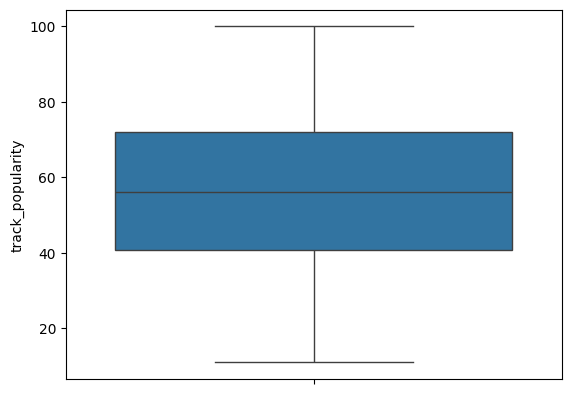

In [ ]:
sns.boxplot(data=eda_training["track_popularity"])
plt.show()

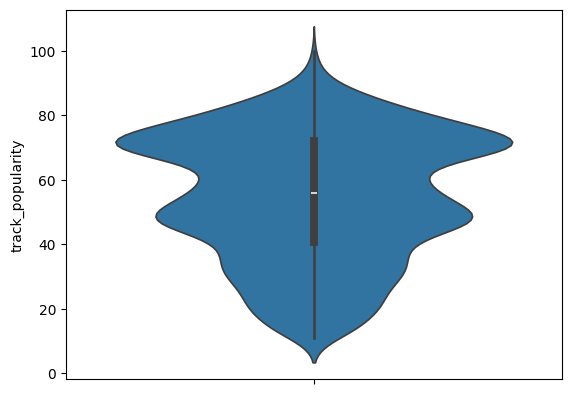

In [ ]:
sns.violinplot(y='track_popularity', data=eda_training)
plt.show()

### **speechiness**

In [ ]:
eda_training["speechiness"].describe()

count    3863.000000
mean        0.100796
std         0.099708
min         0.021900
25%         0.038700
50%         0.056100
75%         0.117000
max         0.927000
Name: speechiness, dtype: float64

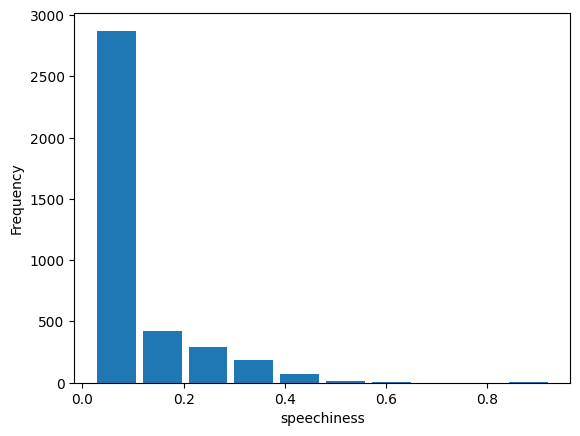

In [ ]:
plt.hist(x=eda_training["speechiness"], bins=10, rwidth=0.85)
plt.xlabel('speechiness', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

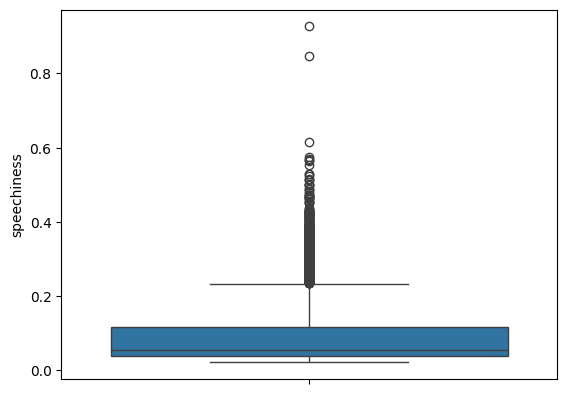

In [ ]:
sns.boxplot(data=eda_training["speechiness"])
plt.show()

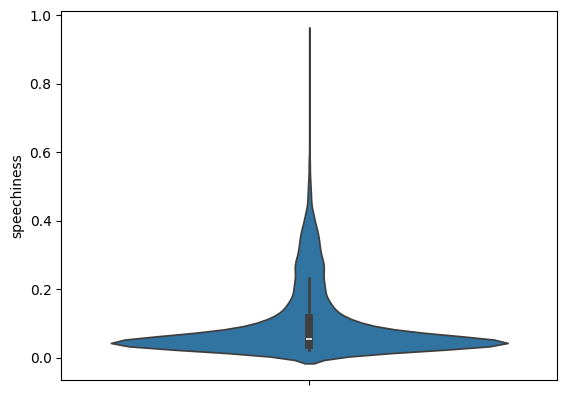

In [ ]:
sns.violinplot(y='speechiness', data=eda_training)
plt.show()

### **instrumentalness**

In [ ]:
eda_training["instrumentalness"].describe()

count    3863.000000
mean        0.200710
std         0.350615
min         0.000000
25%         0.000000
50%         0.000090
75%         0.206000
max         0.991000
Name: instrumentalness, dtype: float64

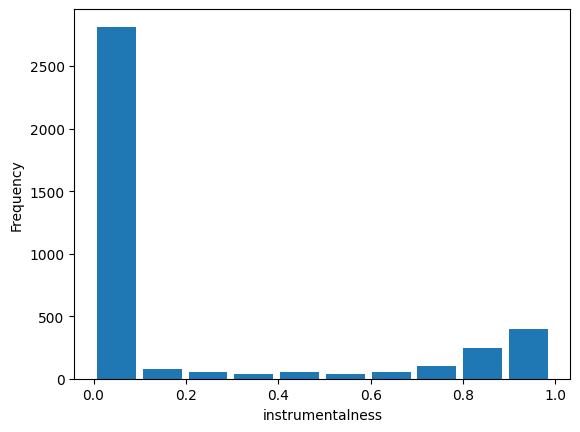

In [ ]:
plt.hist(x=eda_training["instrumentalness"], bins=10, rwidth=0.85)
plt.xlabel('instrumentalness', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

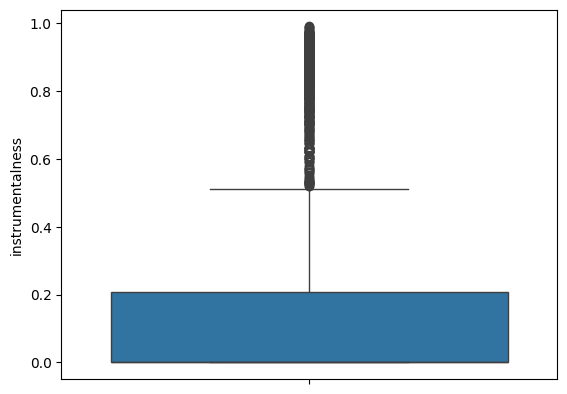

In [ ]:
sns.boxplot(data=eda_training["instrumentalness"])
plt.show()

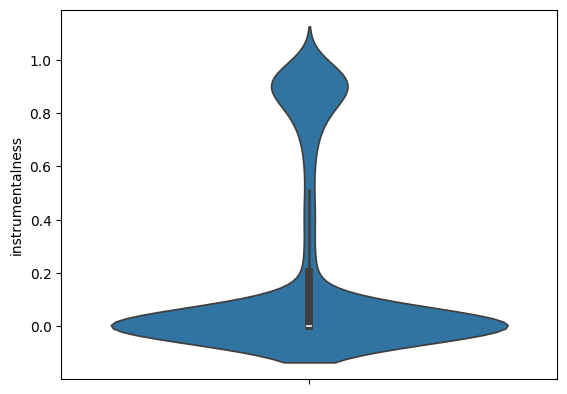

In [ ]:
sns.violinplot(y='instrumentalness', data=eda_training)
plt.show()

### **playlist_genre**

In [ ]:
eda_training["playlist_genre"].describe()

count           3864
unique            35
top       electronic
freq             473
Name: playlist_genre, dtype: object

In [ ]:
print(eda_training["playlist_genre"].unique())

['gaming' 'pop' 'k-pop' 'latin' 'world' 'lofi' 'reggae' 'rock' 'mandopop'
 'brazilian' 'ambient' 'electronic' 'funk' 'arabic' 'hip-hop' 'r&b' 'punk'
 'soul' 'soca' 'metal' 'wellness' 'jazz' 'folk' 'j-pop' 'turkish' 'indian'
 'gospel' 'blues' 'korean' 'afrobeats' 'classical' 'disco' 'indie'
 'cantopop' 'country']


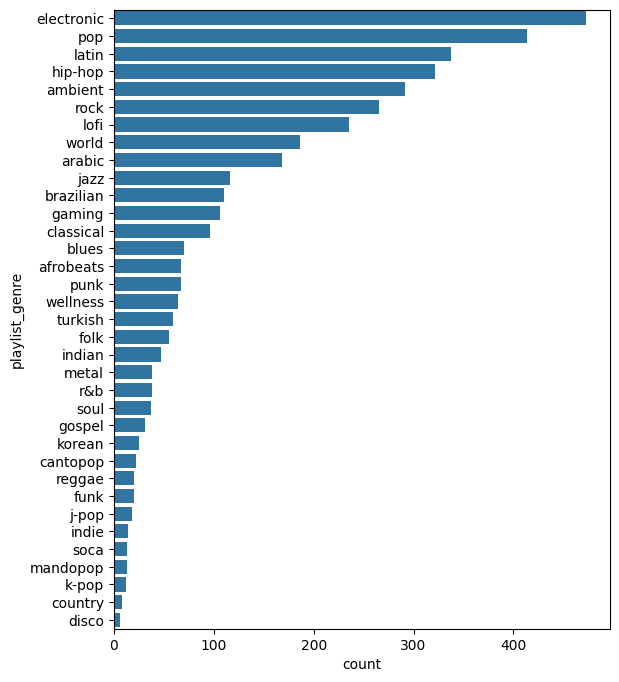

In [ ]:
sns.countplot(
    y=eda_training["playlist_genre"],
    data=eda_training,
    order=eda_training["playlist_genre"].value_counts().index
)
plt.subplots_adjust(top=1.4)
plt.show()

### **playlist_subgenre**

In [ ]:
eda_training["playlist_subgenre"].describe()

count       3864
unique        84
top       modern
freq         539
Name: playlist_subgenre, dtype: object

In [ ]:
print(eda_training["playlist_subgenre"].unique())

['modern' 'throwback' 'chill' 'jewish' 'fusion' 'scandi' 'feel-good'
 'funk' 'meditative' 'global' 'soft' 'tropical' 'hip-hop' 'mainstream'
 'future' 'klezmer' 'techno' 'afro house' 'alternative' 'classic'
 'pop punk' 'grime' 'carnival' 'japanese' 'forró' 'reggaeton' 'hardstyle'
 'cumbia' 'death' 'yoga' 'indie' '80s' 'nordic' 'future bass' 'french'
 'southern' 'gangster' 'throat singing' 'anime' '90s' 'chinese' 'samba'
 'spanish' 'pop' 'drill' 'irish' 'vaporwave' 'bollywood' 'retro'
 'american' 'bhangra' 'delta' 'drama' 'amapiano' 'gqom' 'choral'
 'cinematic' 'afro-latin' 'noir' 'essential' 'smooth' 'academic'
 'soundtracks' 'latin' 'desi' 'melodic' 'italo' 'cajun' 'australian'
 'experimental' 'african' 'trap' 'celtic' 'neo-classical' 'tango'
 'deep house' 'bedroom' 'workout' 'heavy' 'nigerian' 'classical'
 'indigenous' 'avant-garde' 'post-rock']


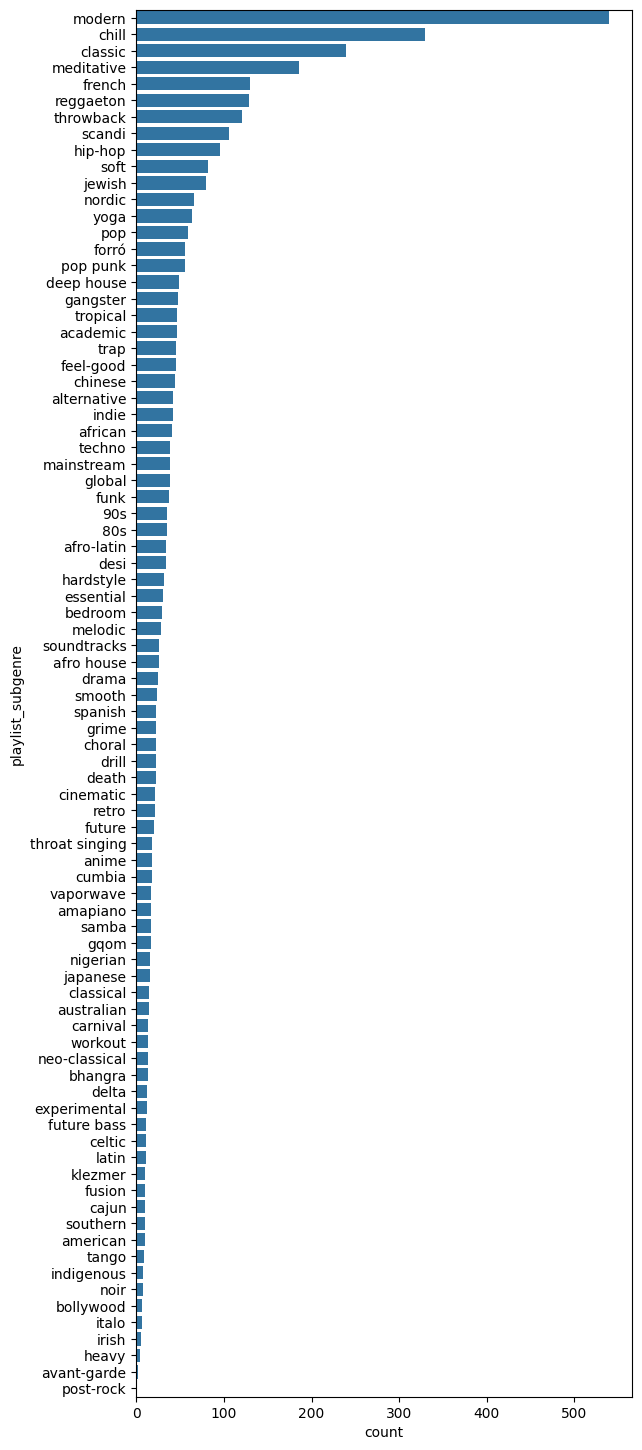

In [ ]:
sns.countplot(
  y=eda_training["playlist_subgenre"],
  data=eda_training,
  order=eda_training["playlist_subgenre"].value_counts().index
)
plt.subplots_adjust(top=3)
plt.show()

### **track_name**

In [ ]:
eda_training["track_name"].describe()

count          3864
unique         3558
top       Too Sweet
freq              5
Name: track_name, dtype: object

In [ ]:
eda_training['track_name'].str.len().describe()

count    3864.000000
mean       15.308489
std        11.522157
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       138.000000
Name: track_name, dtype: float64

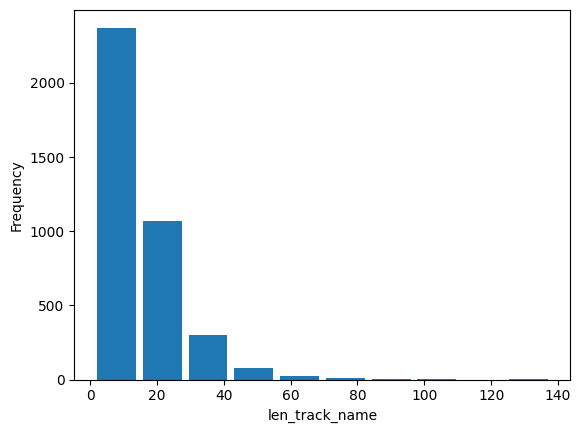

In [ ]:
plt.hist(x=eda_training["track_name"].str.len(), bins=10, rwidth=0.85)
plt.xlabel('len_track_name', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

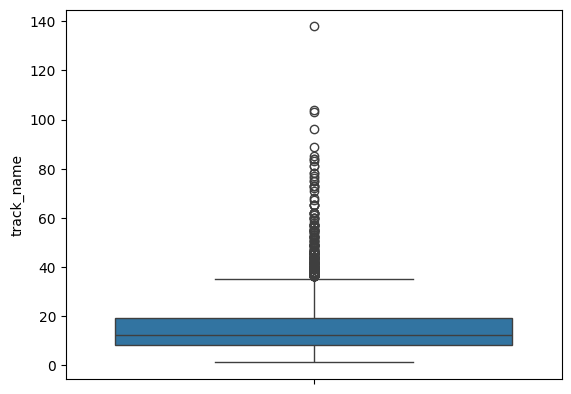

In [ ]:
sns.boxplot(data=eda_training["track_name"].str.len())
plt.show()

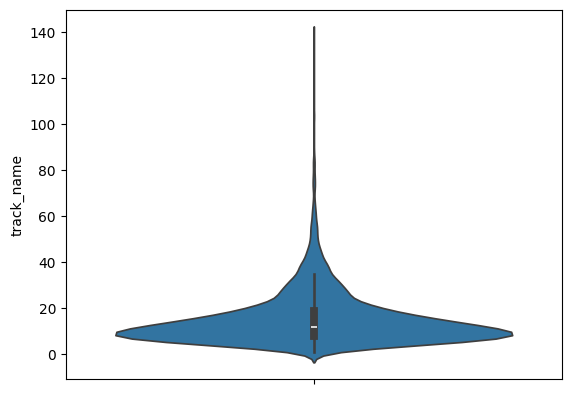

In [ ]:
sns.violinplot(data=eda_training, y=eda_training["track_name"].str.len())
plt.show()

### **tempo**

In [ ]:
eda_training['tempo'].describe()

count    3863.000000
mean      118.307741
std        28.376974
min        48.232000
25%        96.190000
50%       118.034000
75%       136.546500
max       241.426000
Name: tempo, dtype: float64

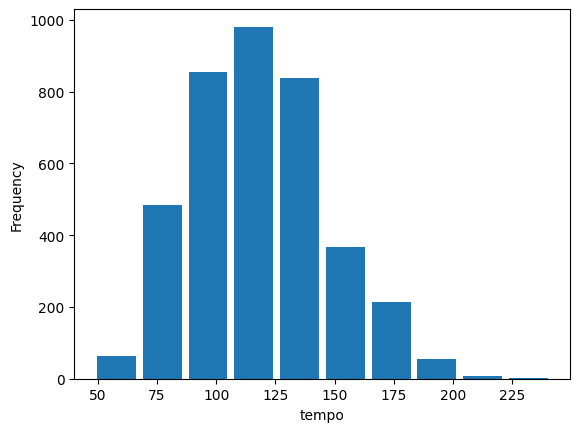

In [ ]:
plt.hist(x=eda_training["tempo"], bins=10, rwidth=0.85)
plt.xlabel('tempo', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

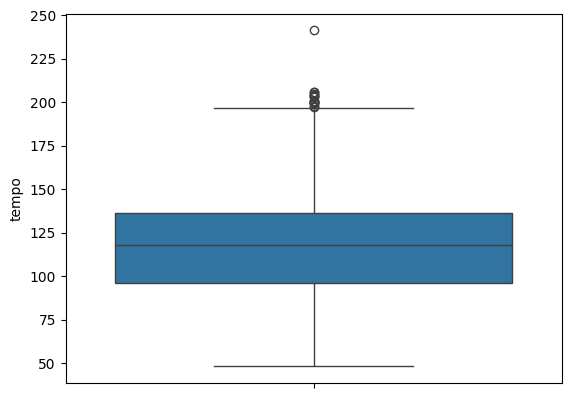

In [ ]:
sns.boxplot(data=eda_training["tempo"])
plt.show()

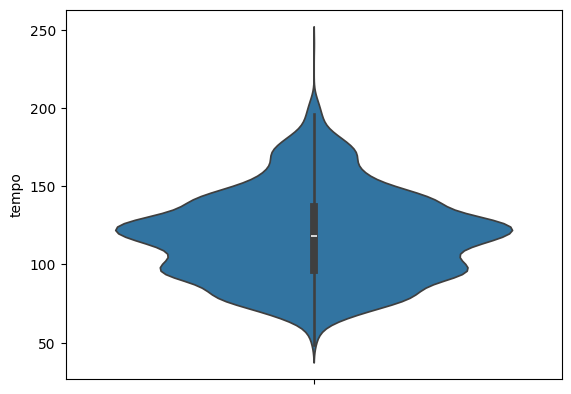

In [ ]:
sns.violinplot(data=eda_training, y=eda_training["tempo"])
plt.show()

### **danceability**

In [ ]:
eda_training['danceability'].describe()

count    3863.000000
mean        0.623382
std         0.189146
min         0.059700
25%         0.525000
50%         0.655000
75%         0.760000
max         0.979000
Name: danceability, dtype: float64

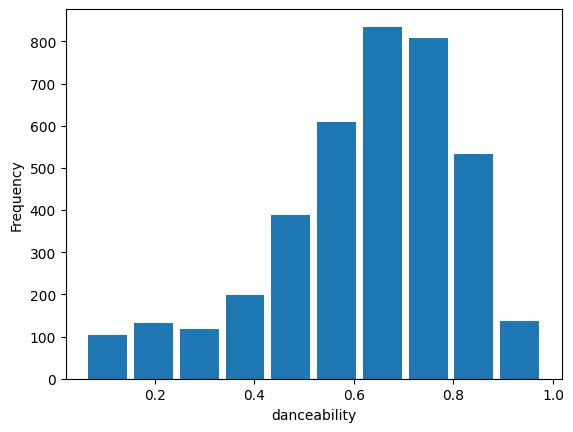

In [ ]:
plt.hist(x=eda_training["danceability"], bins=10, rwidth=0.85)
plt.xlabel('danceability', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

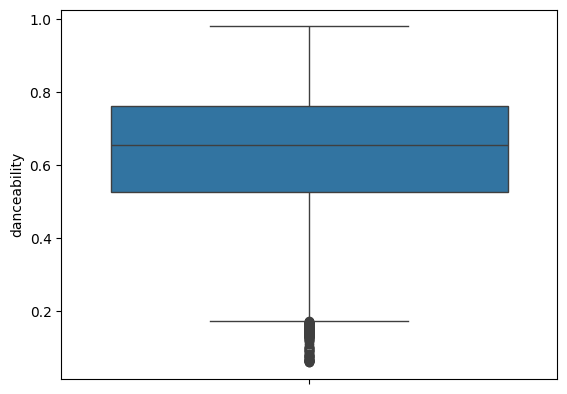

In [ ]:
sns.boxplot(data=eda_training["danceability"])
plt.show()

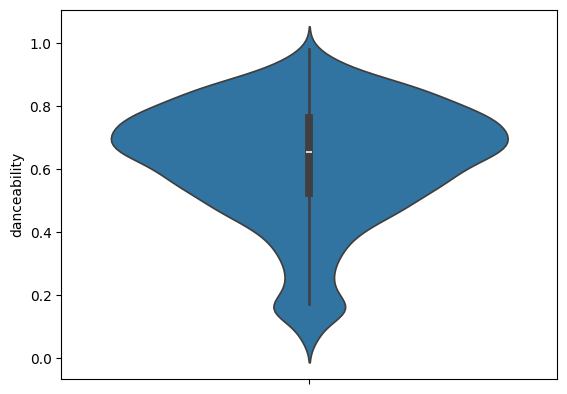

In [ ]:
sns.violinplot(data=eda_training, y=eda_training["danceability"])
plt.show()

### **energy**

In [ ]:
eda_training['energy'].describe()

count    3863.000000
mean        0.585941
std         0.246830
min         0.000202
25%         0.438000
50%         0.635000
75%         0.775000
max         0.996000
Name: energy, dtype: float64

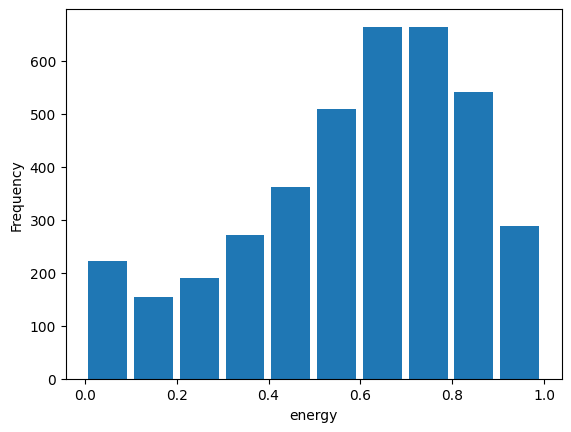

In [ ]:
plt.hist(x=eda_training["energy"], bins=10, rwidth=0.85)
plt.xlabel('energy', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

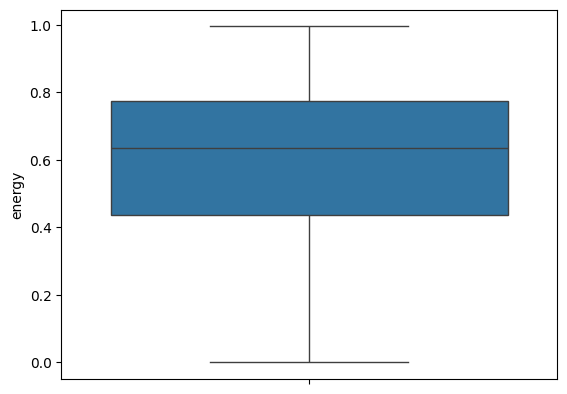

In [ ]:
sns.boxplot(data=eda_training["energy"])
plt.show()

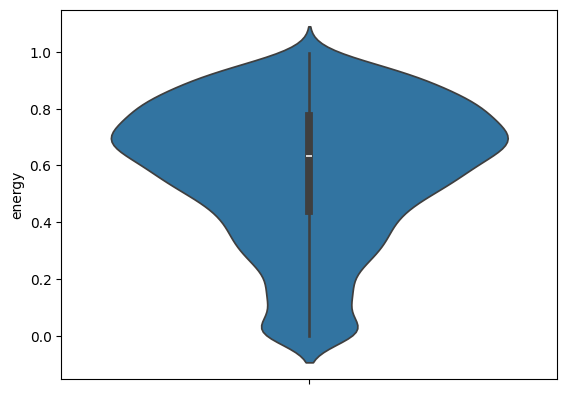

In [ ]:
sns.violinplot(data=eda_training, y=eda_training["energy"])
plt.show()

### **loudness**

In [ ]:
eda_training['loudness'].describe()

count    3863.000000
mean       -9.277320
std         7.068056
min       -48.069000
25%       -10.339500
50%        -7.171000
75%        -5.342500
max         1.075000
Name: loudness, dtype: float64

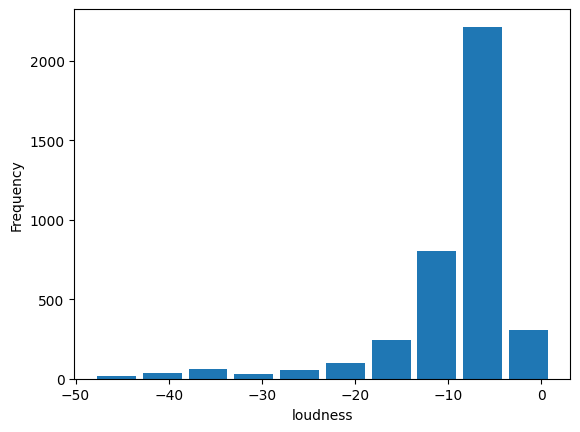

In [ ]:
plt.hist(x=eda_training["loudness"], bins=10, rwidth=0.85)
plt.xlabel('loudness', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

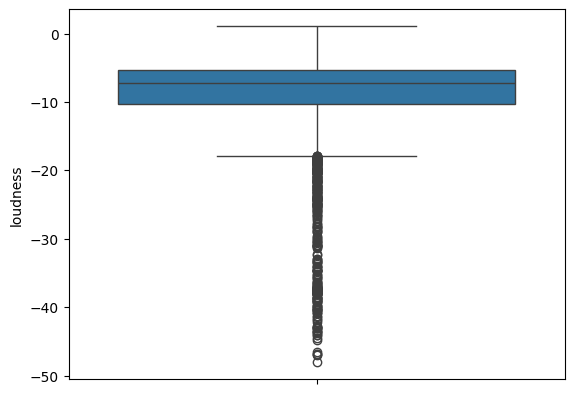

In [ ]:
sns.boxplot(data=eda_training["loudness"])
plt.show()

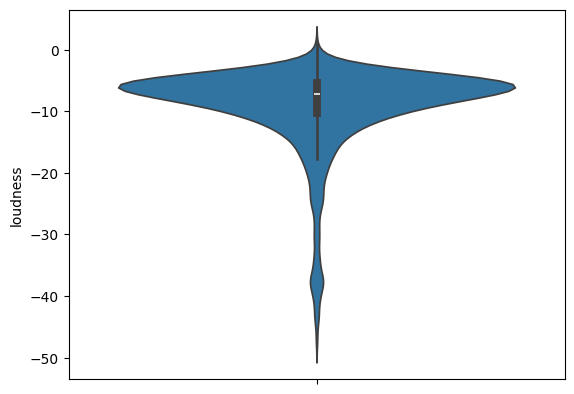

In [ ]:
sns.violinplot(data=eda_training, y=eda_training["loudness"])
plt.show()

### **mode**

In [ ]:
eda_training['mode'].describe()

count    3863.00000
mean        0.56614
std         0.49567
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: mode, dtype: float64

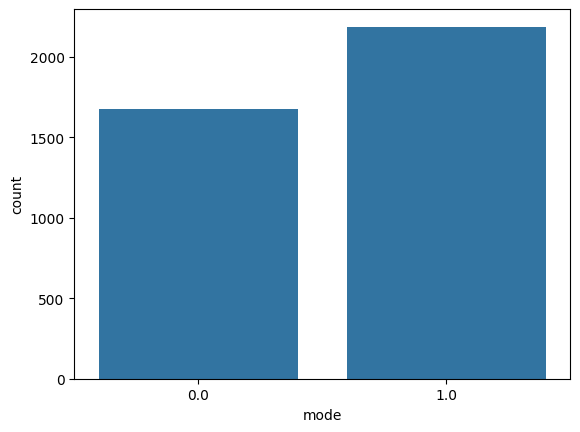

In [ ]:
sns.countplot(
  x=eda_training["mode"],
  data=eda_training
)
plt.show()

### **key**

In [ ]:
eda_training['key'].describe()

count    3863.000000
mean        5.200362
std         3.571962
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

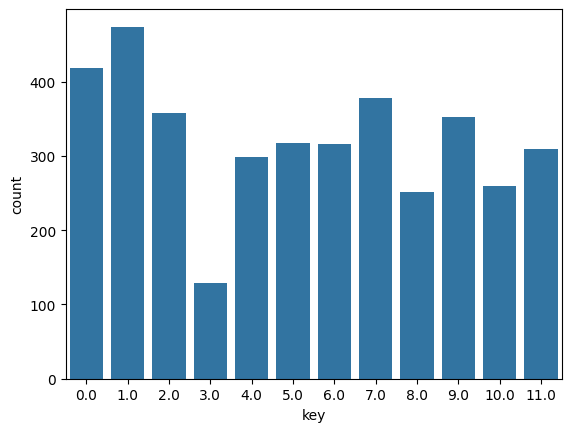

In [ ]:
sns.countplot(
  x=eda_training["key"],
  data=eda_training
)
plt.show()

### **valence**

In [ ]:
eda_training['valence'].describe()

count    3863.000000
mean        0.481852
std         0.259278
min         0.029600
25%         0.268000
50%         0.483000
75%         0.692000
max         0.982000
Name: valence, dtype: float64

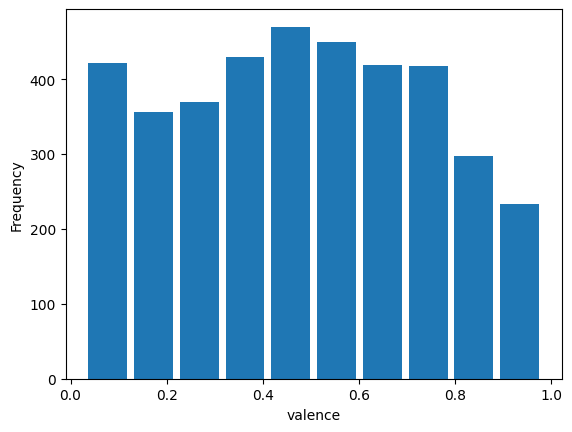

In [ ]:
plt.hist(x=eda_training["valence"], bins=10, rwidth=0.85)
plt.xlabel('valence', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

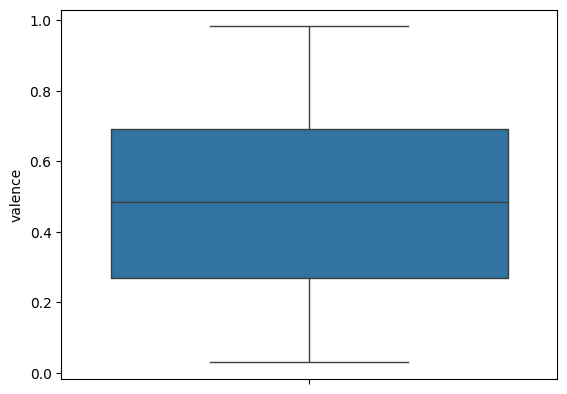

In [ ]:
sns.boxplot(data=eda_training["valence"])
plt.show()

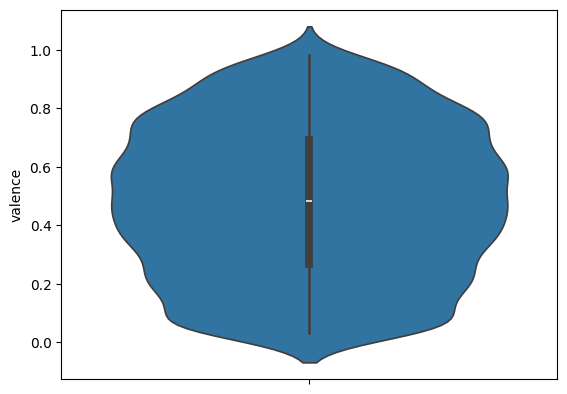

In [ ]:
sns.violinplot(data=eda_training, y=eda_training["valence"])
plt.show()

## **Multivariate analysis**

###**Question 1: At which track_popularity would a song be identified as having high or having low popularity?**

In [ ]:
eda_training[eda_training['popularity'] == 'high']['track_popularity'].describe()

count    1359.000000
mean       75.769684
std         6.035908
min        68.000000
25%        71.000000
50%        74.000000
75%        79.000000
max       100.000000
Name: track_popularity, dtype: float64

*   There are 1359 records that have high popularity.
*   The mean at which they're considered popular is at 76 track_popularity.
*   The minimum track_popularity is 68 while the maximum is 100.

In [ ]:
eda_training[eda_training['popularity'] == 'low']['track_popularity'].describe()

count    2505.000000
mean       43.437126
std        14.813596
min        11.000000
25%        32.000000
50%        46.000000
75%        55.000000
max        68.000000
Name: track_popularity, dtype: float64

*   There are 2505 records that have low popularity (significantly more than those with high popularity).
*   The mean at which they're considered less popular is at 43 track_popularity.
*   The minimum track_popularity is 11 while the maximum is 68.

This data shows that the boundary between high popularity and low popularity stands at 68. Anything above 68 is classed as 'high' popularity while anything below 68 is classed as 'low' popularity.

### **Question 2: Does the speechiness to instrumentalness ratio influence the song’s popularity?**

In [ ]:
# ratio of instrumentalness to speechiness
eda_training['inst_speech_ratio'] = eda_training['instrumentalness'] / (eda_training['speechiness'] + 0.001)  # add 0.001 to avoid division by zero

# check correlation with popularity
print(eda_training[['inst_speech_ratio', 'track_popularity']].corr())

                   inst_speech_ratio  track_popularity
inst_speech_ratio           1.000000         -0.262845
track_popularity           -0.262845          1.000000


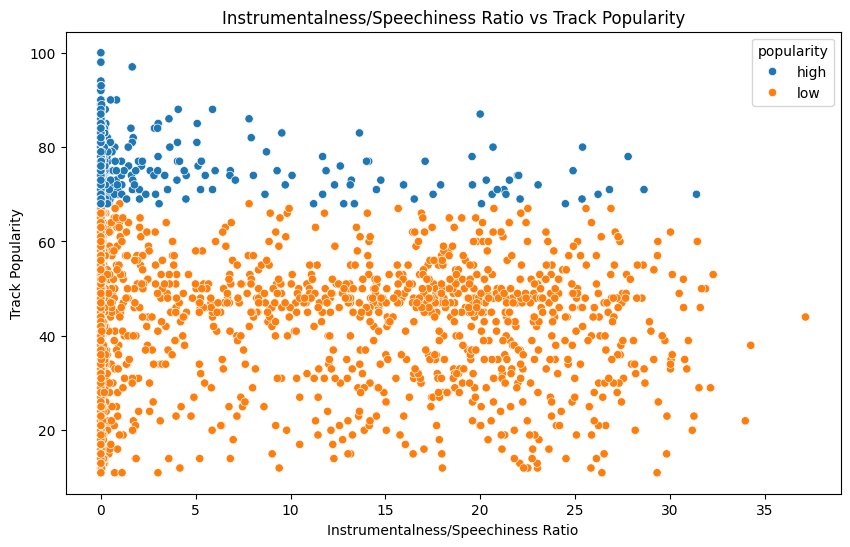

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eda_training, x='inst_speech_ratio', y='track_popularity', hue='popularity')
plt.title('Instrumentalness/Speechiness Ratio vs Track Popularity')
plt.xlabel('Instrumentalness/Speechiness Ratio')
plt.ylabel('Track Popularity')
plt.show()

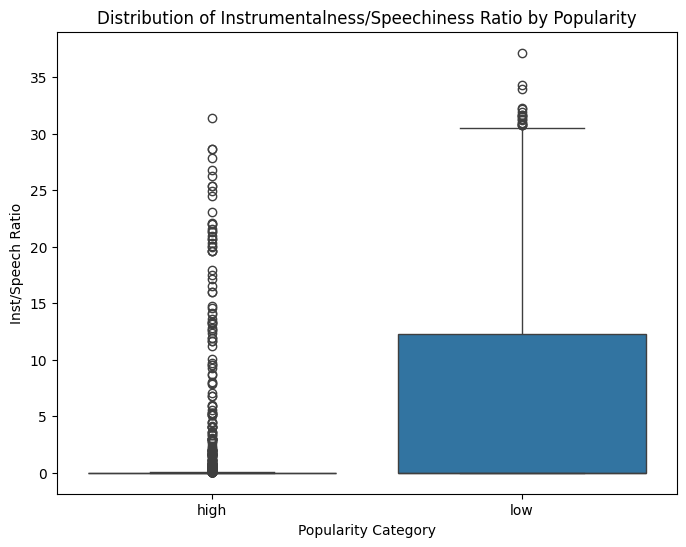

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_training, x='popularity', y='inst_speech_ratio')
plt.title('Distribution of Instrumentalness/Speechiness Ratio by Popularity')
plt.xlabel('Popularity Category')
plt.ylabel('Inst/Speech Ratio')
plt.show()

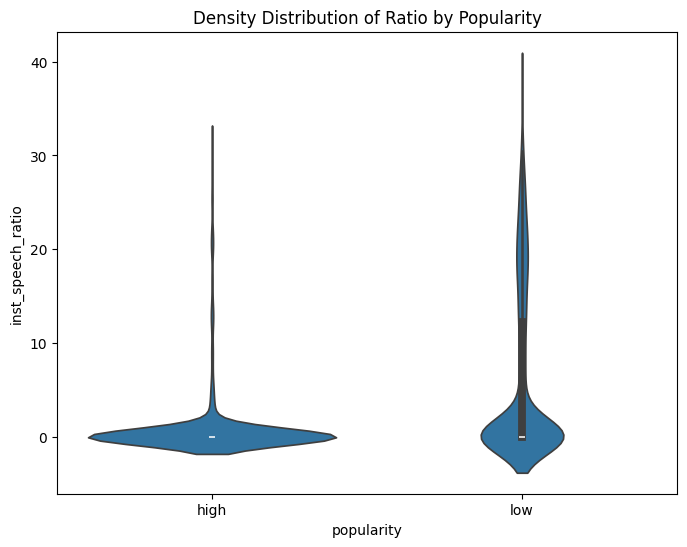

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=eda_training, x='popularity', y='inst_speech_ratio')
plt.title('Density Distribution of Ratio by Popularity')
plt.show()

### **Question 3: Would songs of a certain playlist_genre be more likely to be popular or less popular?**

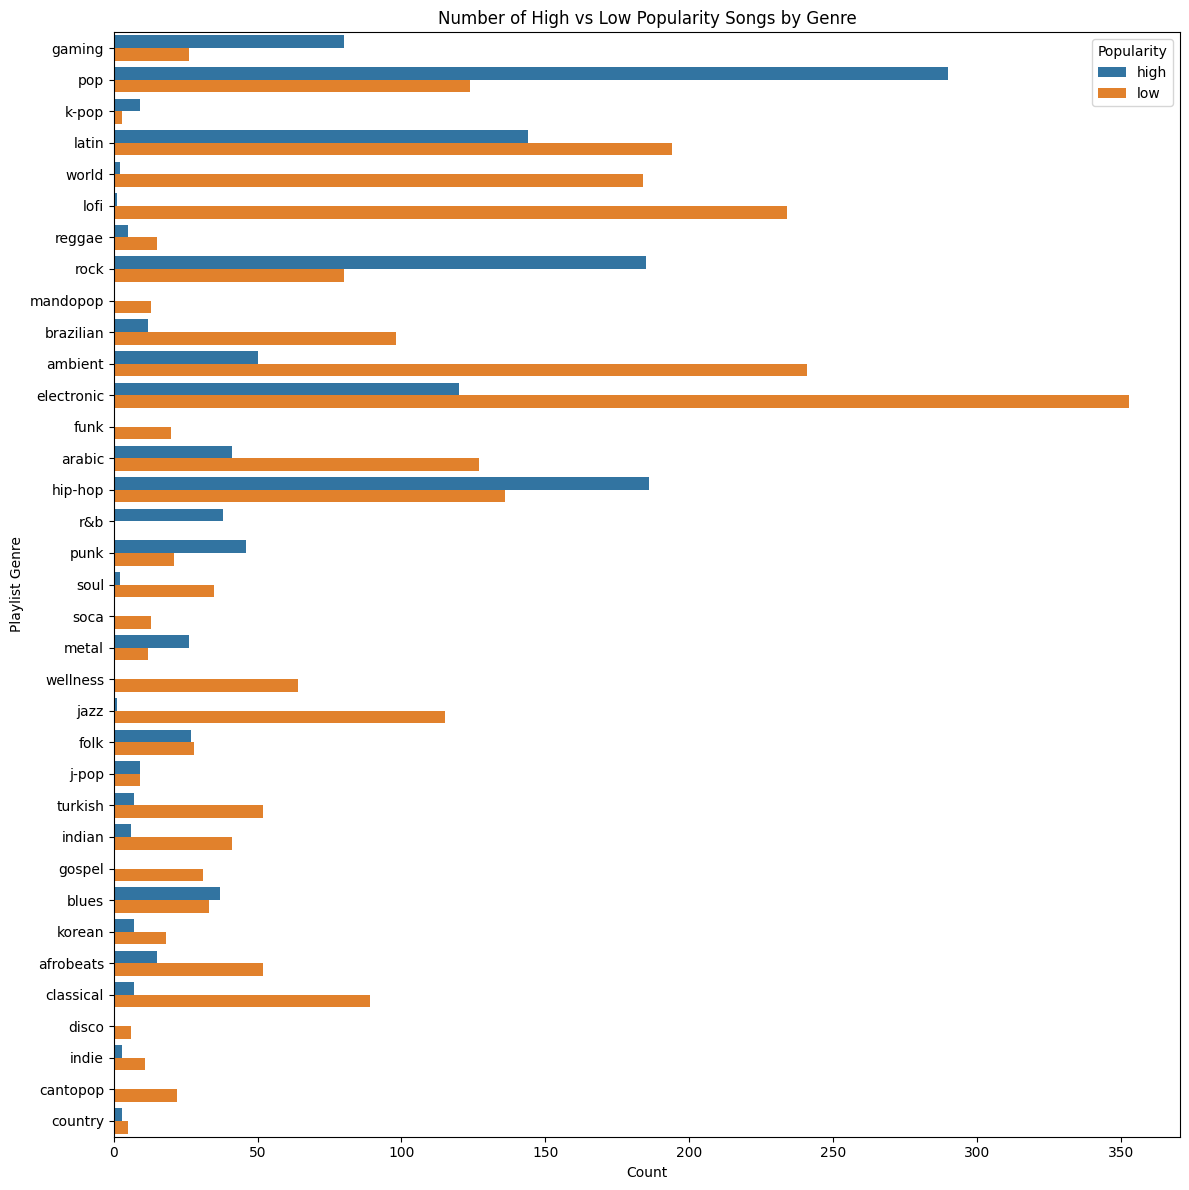

In [ ]:
plt.figure(figsize=(12, 12))
sns.countplot(data=eda_training, y='playlist_genre', hue='popularity')
plt.title('Number of High vs Low Popularity Songs by Genre')
plt.ylabel('Playlist Genre')
plt.xlabel('Count')
plt.legend(title='Popularity')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

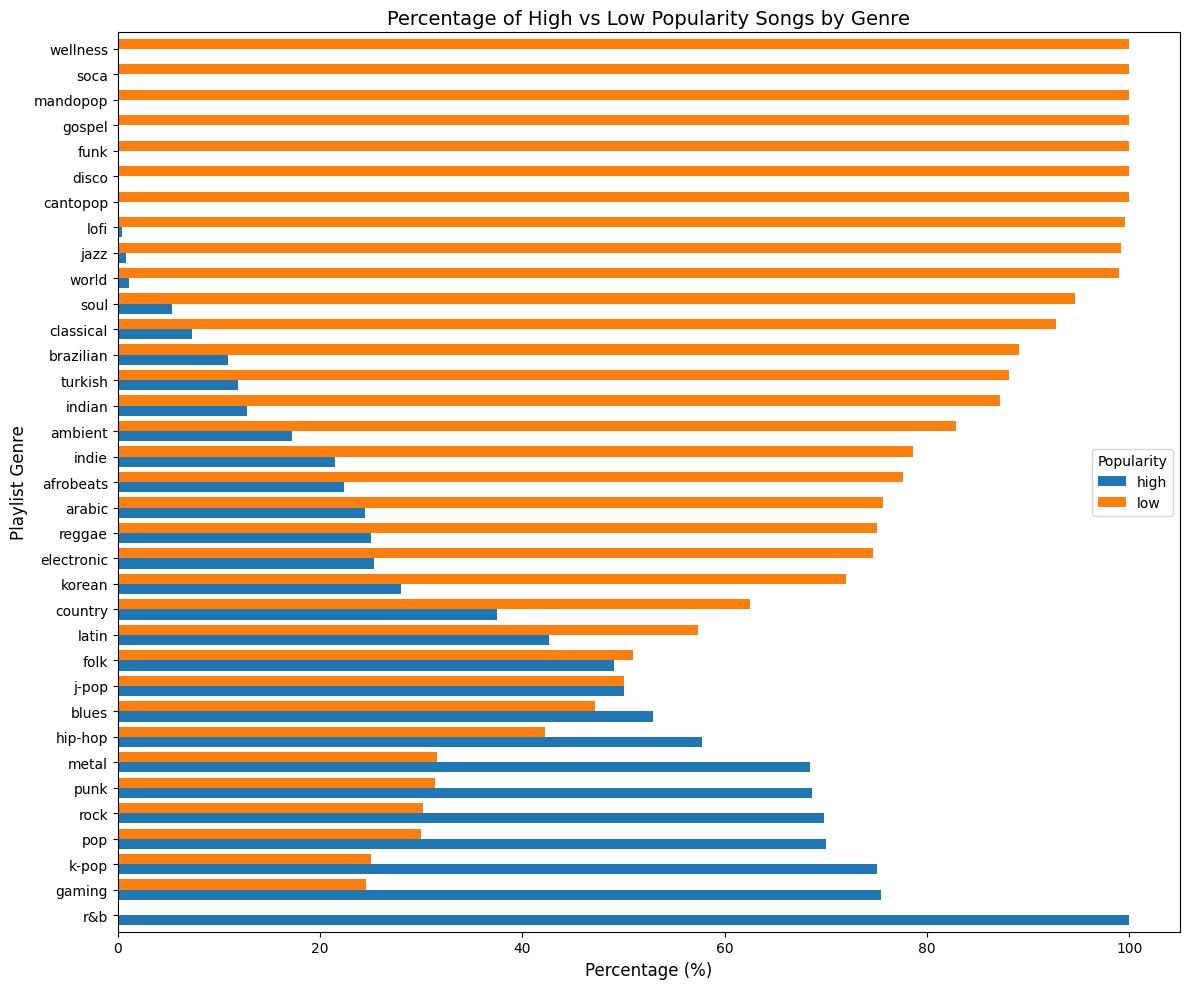

In [ ]:
high_popularity_counts = eda_training[eda_training['popularity'] == 'high']['playlist_genre'].value_counts()
high_popularity_per = high_popularity_counts / eda_training["playlist_genre"].value_counts() * 100

low_popularity_counts = eda_training[eda_training['popularity'] == 'low']['playlist_genre'].value_counts()
low_popularity_per = low_popularity_counts / eda_training["playlist_genre"].value_counts() * 100

plot_data = pd.DataFrame({
    'high': high_popularity_per,
    'low': low_popularity_per
})

plot_data = plot_data.sort_values('high', ascending=False)

plt.figure(figsize=(12, 10))
ax = plot_data.plot(kind='barh',
                   figsize=(12, 10),
                   width=0.8)

plt.title('Percentage of High vs Low Popularity Songs by Genre', fontsize=14)
plt.ylabel('Playlist Genre', fontsize=12)
plt.xlabel('Percentage (%)', fontsize=12)
plt.legend(title='Popularity')
plt.tight_layout()
plt.show()

### **Question 4: Would songs of a certain playlist_subgenre be more likely to be popular or less popular?**

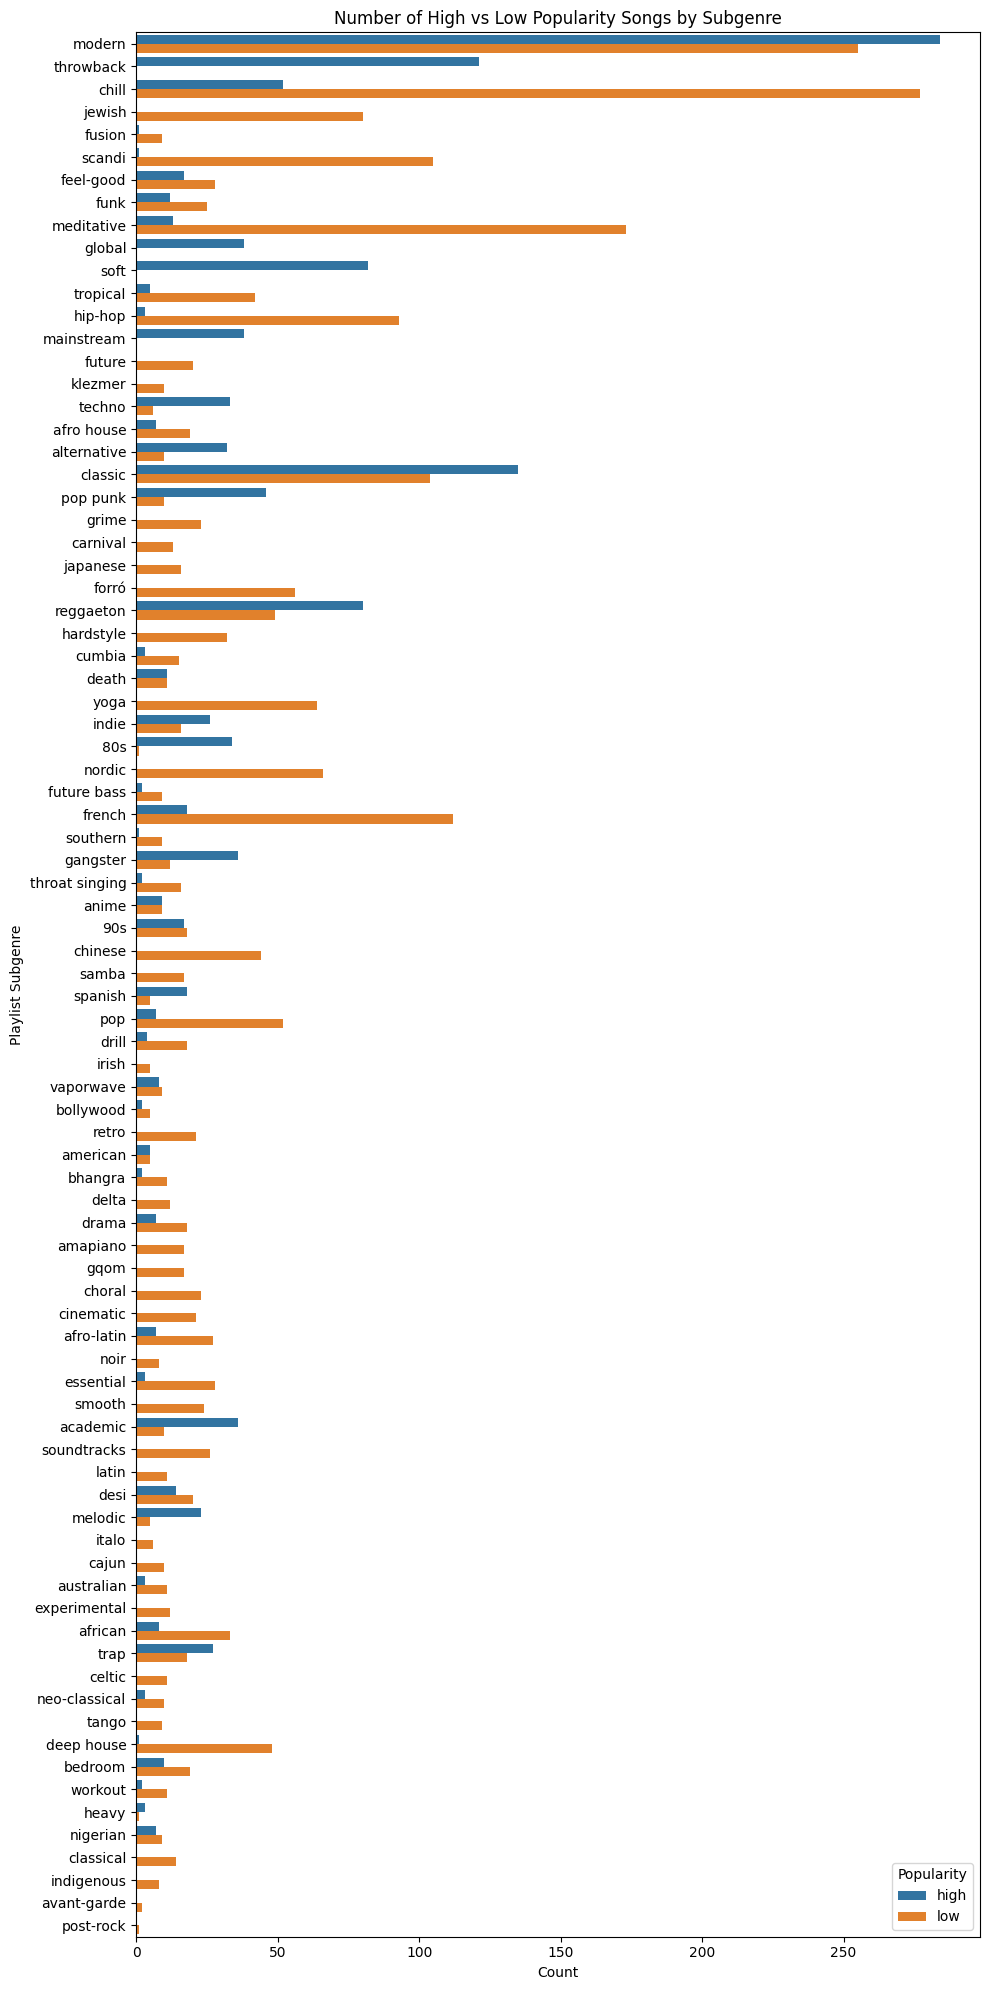

In [ ]:
plt.figure(figsize=(10, 20))
sns.countplot(data=eda_training, y='playlist_subgenre', hue='popularity')
plt.title('Number of High vs Low Popularity Songs by Subgenre')
plt.ylabel('Playlist Subgenre')
plt.xlabel('Count')
plt.legend(title='Popularity')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

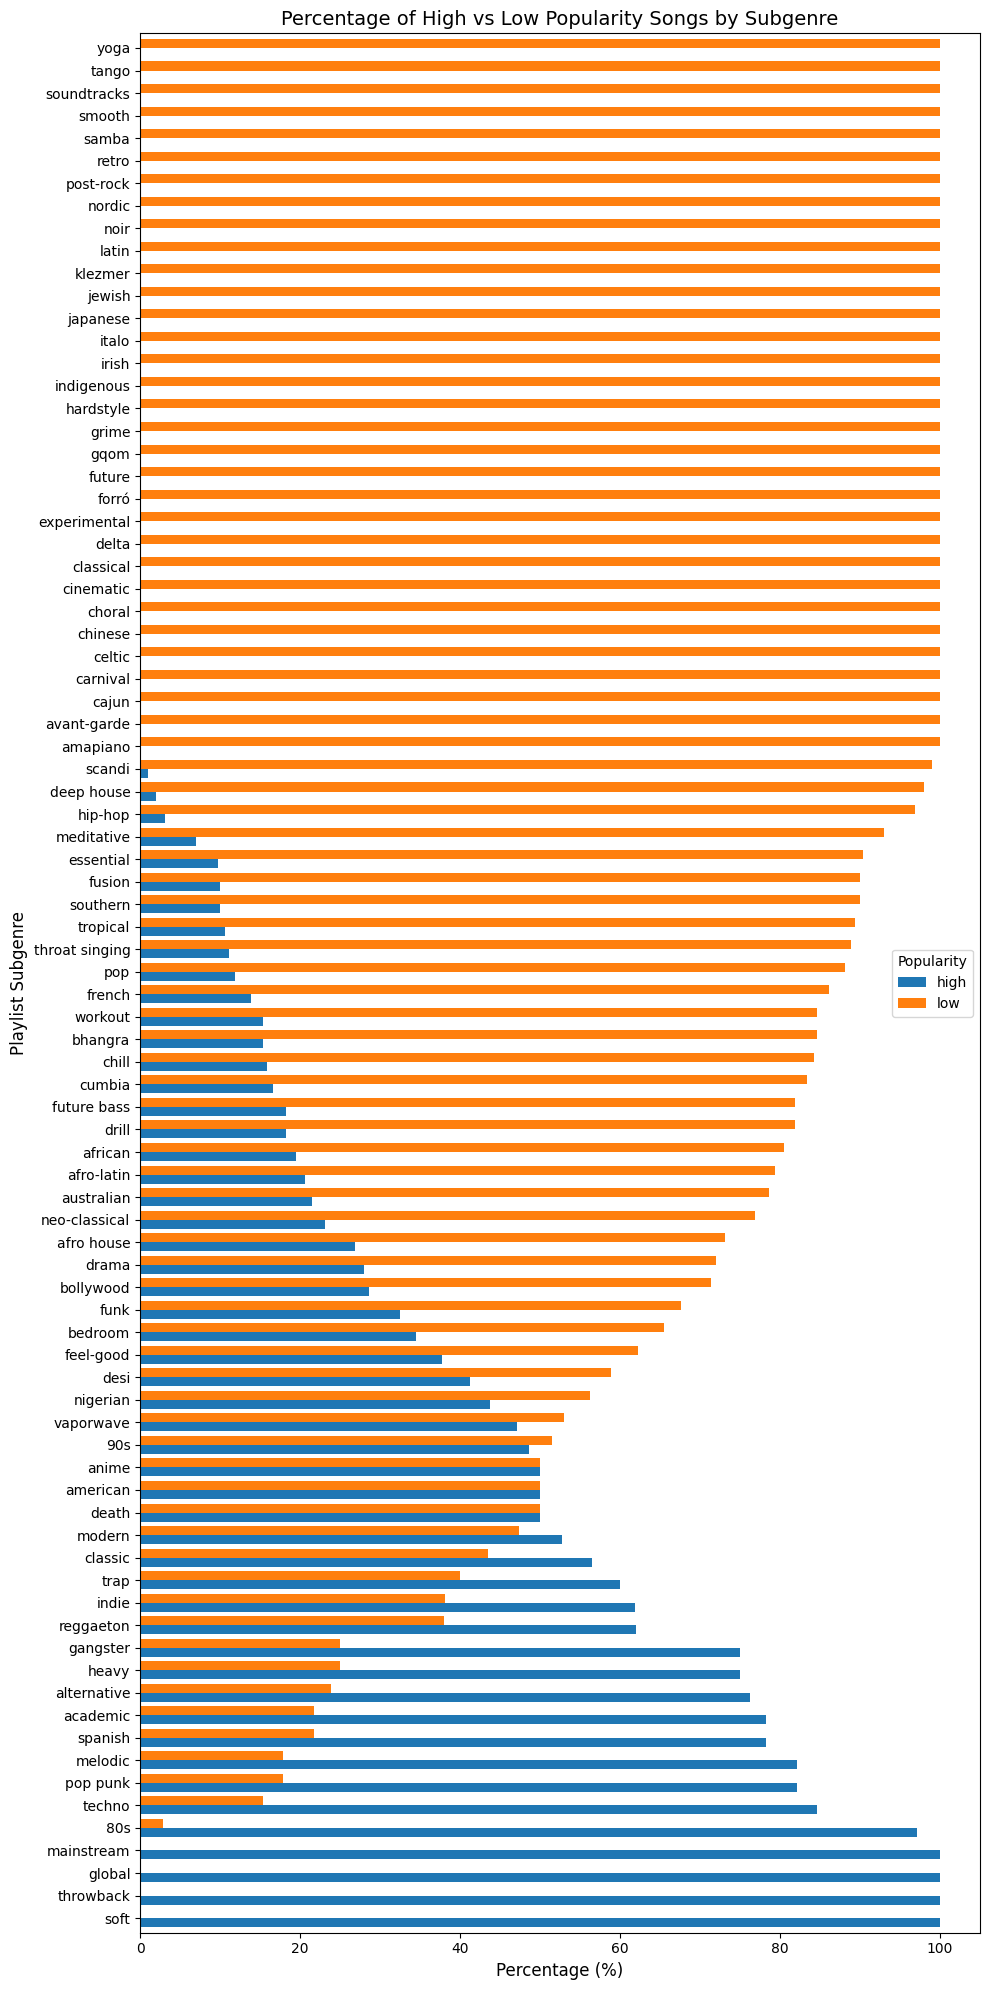

In [ ]:
high_popularity_counts = eda_training[eda_training['popularity'] == 'high']['playlist_subgenre'].value_counts()
high_popularity_per = high_popularity_counts / eda_training["playlist_subgenre"].value_counts() * 100

low_popularity_counts = eda_training[eda_training['popularity'] == 'low']['playlist_subgenre'].value_counts()
low_popularity_per = low_popularity_counts / eda_training["playlist_subgenre"].value_counts() * 100

plot_data = pd.DataFrame({
    'high': high_popularity_per,
    'low': low_popularity_per
})

plot_data = plot_data.sort_values('high', ascending=False)

plt.figure(figsize=(12, 10))
ax = plot_data.plot(kind='barh',
                   figsize=(10, 20),
                   width=0.8)

plt.title('Percentage of High vs Low Popularity Songs by Subgenre', fontsize=14)
plt.ylabel('Playlist Subgenre', fontsize=12)
plt.xlabel('Percentage (%)', fontsize=12)
plt.legend(title='Popularity')
plt.tight_layout()
plt.show()

### **Question 5: Does the length of a track_name influence a song’s popularity?**

In [ ]:
eda_training[eda_training['popularity'] == 'high']['track_name'].str.len().describe()

count    1359.000000
mean       16.608536
std        11.427486
min         2.000000
25%         9.000000
50%        13.000000
75%        21.000000
max        83.000000
Name: track_name, dtype: float64

In [ ]:
eda_training[eda_training['popularity'] == 'low']['track_name'].str.len().describe()

count    2505.000000
mean       14.603194
std        11.514187
min         1.000000
25%         8.000000
50%        11.000000
75%        17.000000
max       138.000000
Name: track_name, dtype: float64

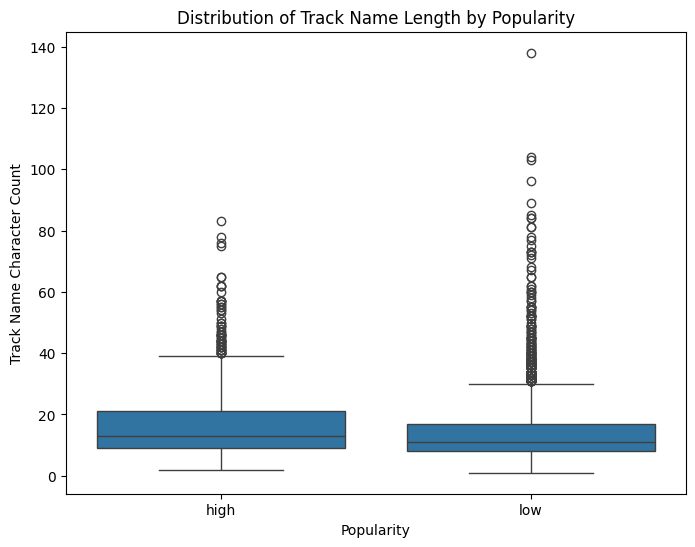

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_training, x='popularity', y=eda_training['track_name'].str.len())
plt.title('Distribution of Track Name Length by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Track Name Character Count')
plt.show()

### **Question 6: Does the combination of  tempo, danceability, energy, and loudness influence the popularity of a song?**

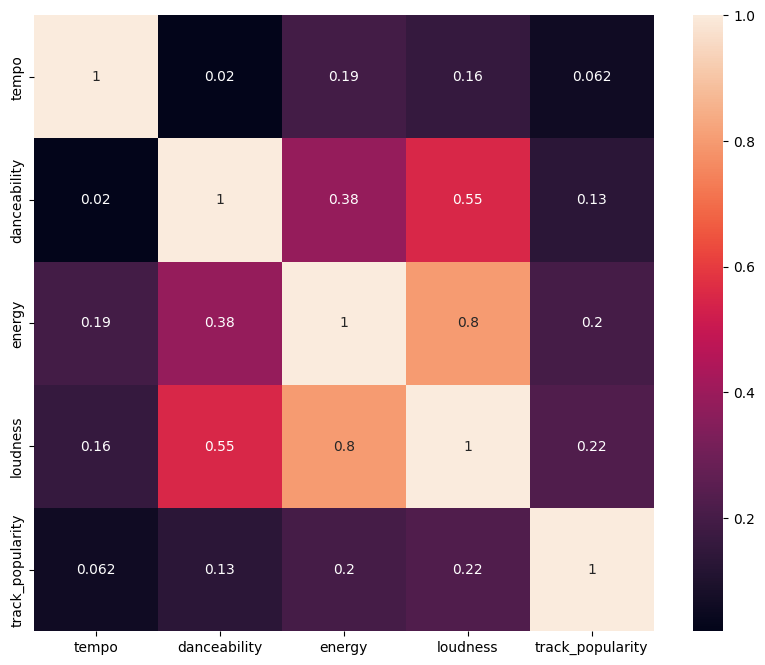

In [ ]:
combo1 = eda_training[['tempo', 'danceability', 'energy', 'loudness', 'track_popularity']]
corr = combo1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

The pairs of danceability and loudness, and energy and loudness seem to be correlated but it is still unclear if all 4 variables influence popularity.

/tmp/ipython-input-2997067685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo1["popularity"] = eda_training["popularity"]


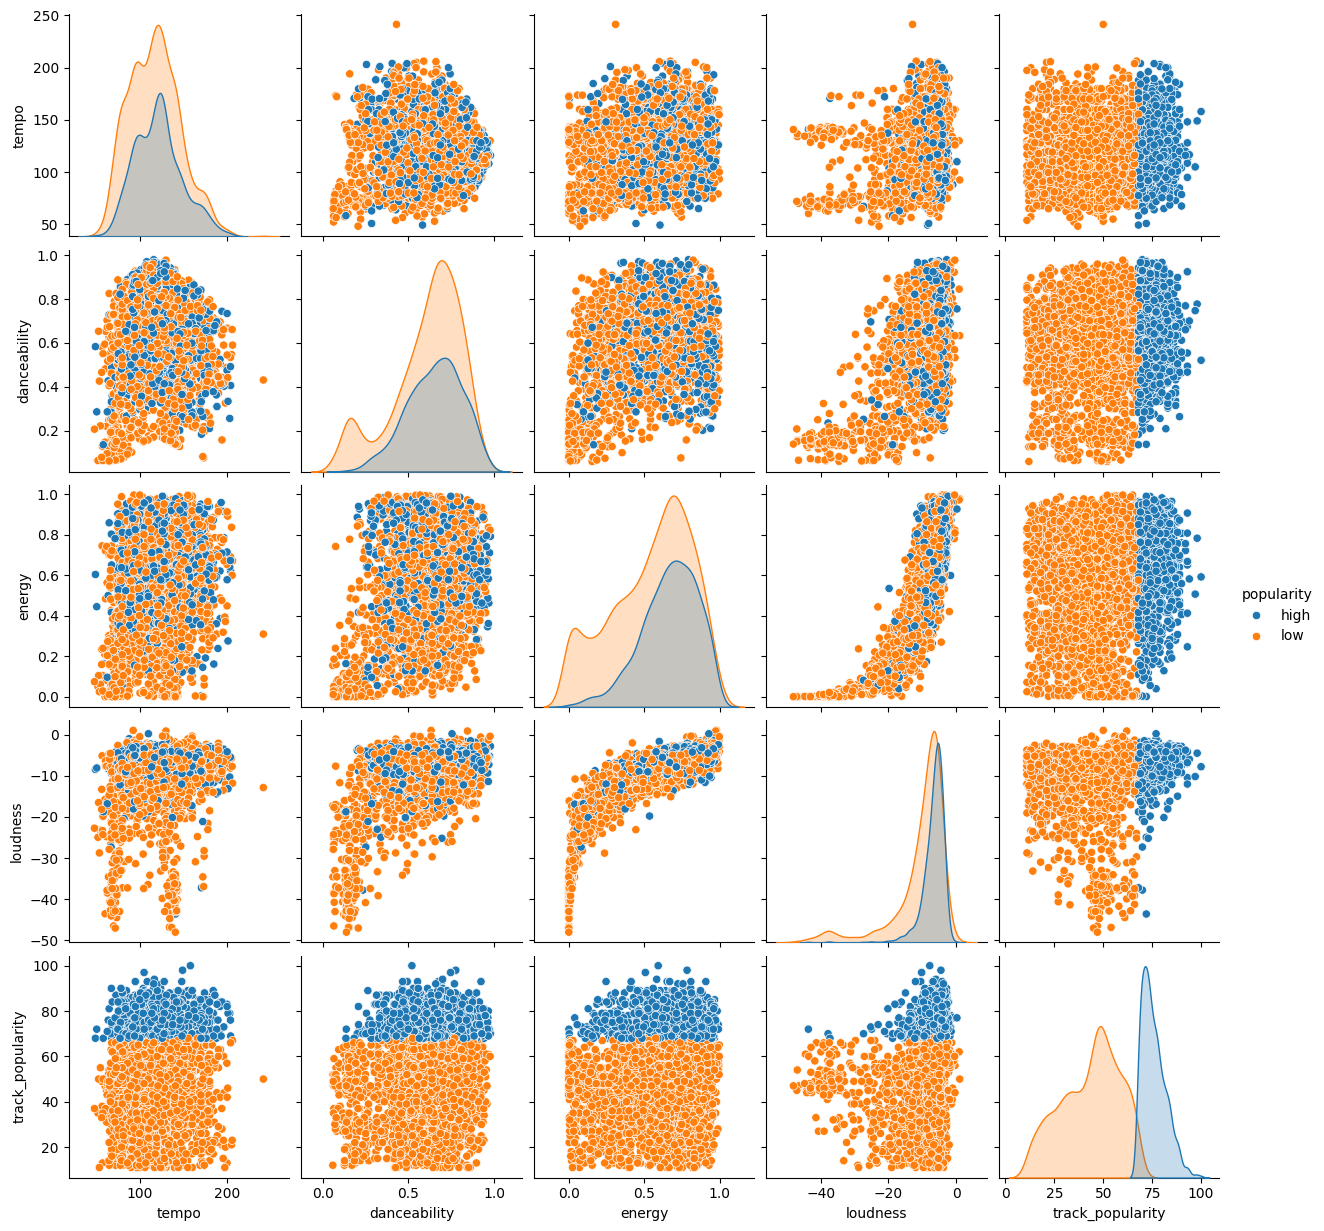

In [ ]:
combo1["popularity"] = eda_training["popularity"]
sns.pairplot(combo1, hue="popularity")
plt.show()

### **Question 7: Does the combination of mode, key, and valence influence the popularity of a song?**

Text(0.5, 1.0, 'Mode vs Popularity')

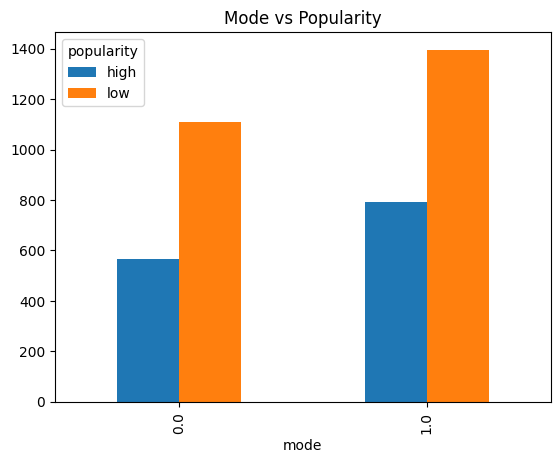

In [ ]:
mode_pop = pd.crosstab(eda_training['mode'], eda_training['popularity'])
mode_pop.plot(kind='bar')
plt.title('Mode vs Popularity')

Text(0.5, 1.0, 'Key vs Popularity')

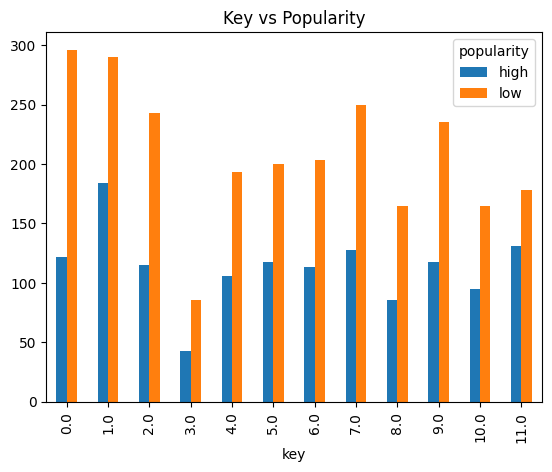

In [ ]:
key_pop = pd.crosstab(eda_training['key'], eda_training['popularity'])
key_pop.plot(kind='bar')
plt.title('Key vs Popularity')

Text(0.5, 1.0, 'Valence vs Popularity')

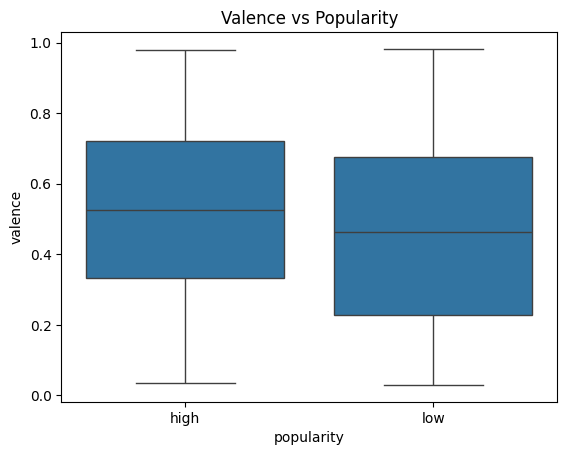

In [ ]:
sns.boxplot(data=eda_training, x='popularity', y='valence')
plt.title('Valence vs Popularity')

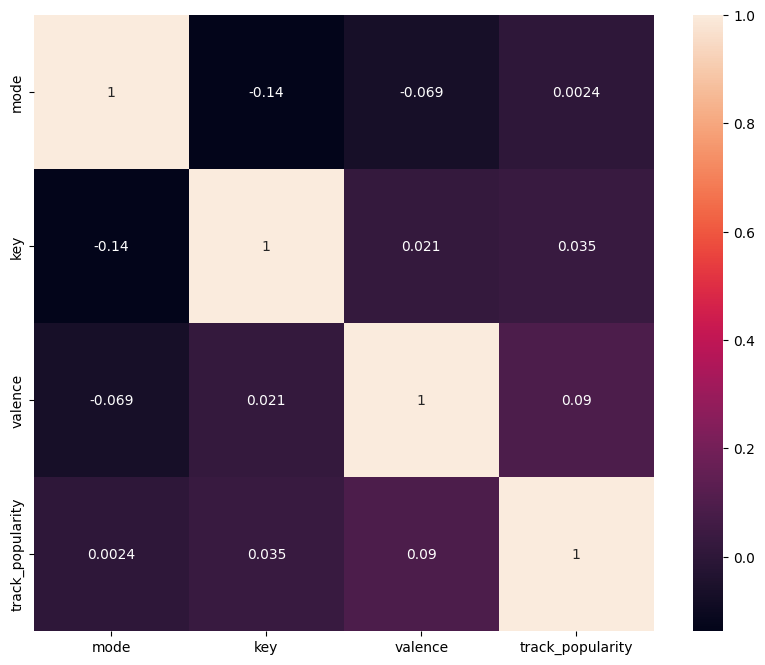

In [ ]:
combo2 = eda_training[['mode', 'key', 'valence', 'track_popularity']]
corr = combo2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

# **Data cleaning**

## **Dropping unnecessary columns**

In [ ]:
columns_to_drop = ['analysis_url', 'id', 'playlist_id', 'playlist_name',
                   'track_album_id', 'track_album_name', 'track_artist',
                   'track_href', 'track_id', 'type', 'uri',
                   'track_album_release_date', 'duration_ms', 'track_name']

In [ ]:
X_train.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name'],
      dtype='object')

In [ ]:
X_train.drop(columns=columns_to_drop, inplace=True)

In [ ]:
X_train.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'energy', 'playlist_genre', 'playlist_subgenre', 'mode',
       'instrumentalness', 'valence', 'key', 'tempo', 'loudness',
       'acousticness', 'liveness'],
      dtype='object')

In [ ]:
X_train.shape

(3864, 15)

Do the same with the testing set.

In [ ]:
X_test.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name'],
      dtype='object')

In [ ]:
X_test.drop(columns=columns_to_drop, inplace=True)

In [ ]:
X_test.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'energy', 'playlist_genre', 'playlist_subgenre', 'mode',
       'instrumentalness', 'valence', 'key', 'tempo', 'loudness',
       'acousticness', 'liveness'],
      dtype='object')

In [ ]:
X_test.shape

(967, 15)

## **Dealing with duplicate values**

In [ ]:
df_songs.duplicated().any()

np.False_

## **Dealing with missing values**

<Axes: >

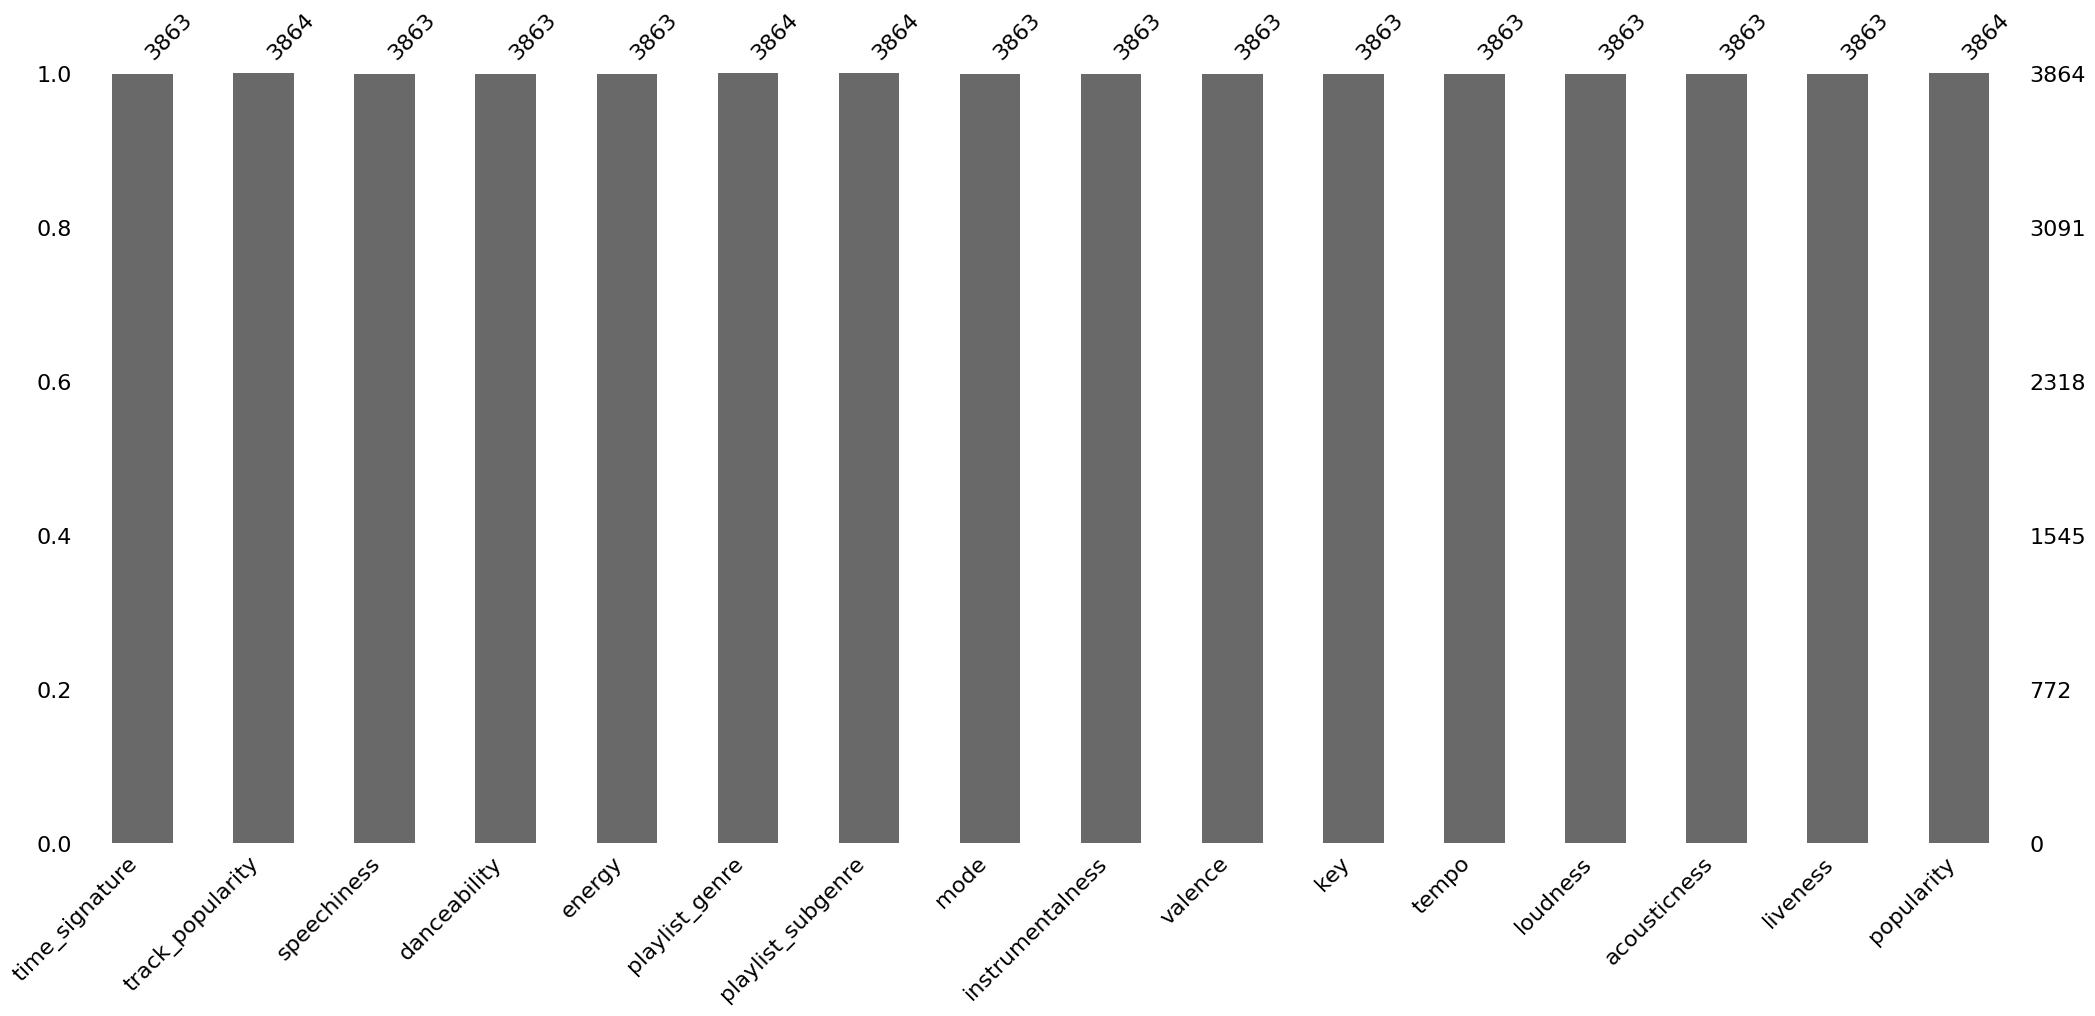

In [ ]:
training = pd.concat([X_train, y_train], axis=1)
msno.bar(training)

In [ ]:
training.isnull().sum()

time_signature       1
track_popularity     0
speechiness          1
danceability         1
energy               1
playlist_genre       0
playlist_subgenre    0
mode                 1
instrumentalness     1
valence              1
key                  1
tempo                1
loudness             1
acousticness         1
liveness             1
popularity           0
dtype: int64

In [ ]:
training.dropna(subset=['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 'time_signature', 'speechiness', 'instrumentalness', 'mode', 'key', 'acousticness'], inplace = True)

In [ ]:
training.isnull().sum()

time_signature       0
track_popularity     0
speechiness          0
danceability         0
energy               0
playlist_genre       0
playlist_subgenre    0
mode                 0
instrumentalness     0
valence              0
key                  0
tempo                0
loudness             0
acousticness         0
liveness             0
popularity           0
dtype: int64

In [ ]:
training.shape

(3863, 16)

In [ ]:
# split back into X_train and y_train
X_train = training.drop(columns=['popularity'])
y_train = training['popularity']

Do the same with the testing set.

In [ ]:
X_test.isnull().sum()

time_signature       0
track_popularity     0
speechiness          0
danceability         0
energy               0
playlist_genre       0
playlist_subgenre    0
mode                 0
instrumentalness     0
valence              0
key                  0
tempo                0
loudness             0
acousticness         0
liveness             0
dtype: int64

## **Capping outliers for SVM and Logistic Regressor**

Speechiness

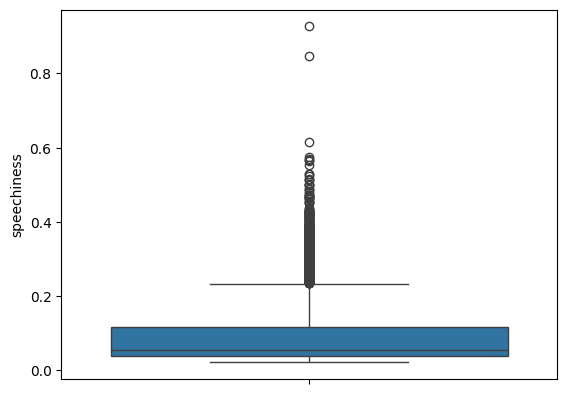

In [ ]:
sns.boxplot(data=X_train["speechiness"])
plt.show()

In [ ]:
# fit on training data
train_winsorized = winsorize(X_train['speechiness'], limits=[0.05, 0.05])

lower_bound = np.percentile(X_train['speechiness'], 5)
upper_bound = np.percentile(X_train['speechiness'], 95)
X_test_winsorized = X_test['speechiness'].clip(lower=lower_bound, upper=upper_bound)

# replace the columns
X_train['speechiness'] = train_winsorized
X_test['speechiness'] = X_test_winsorized

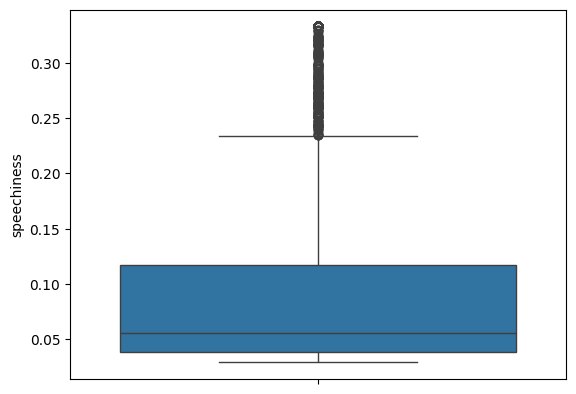

In [ ]:
sns.boxplot(data=X_train["speechiness"])
plt.show()

Danceability

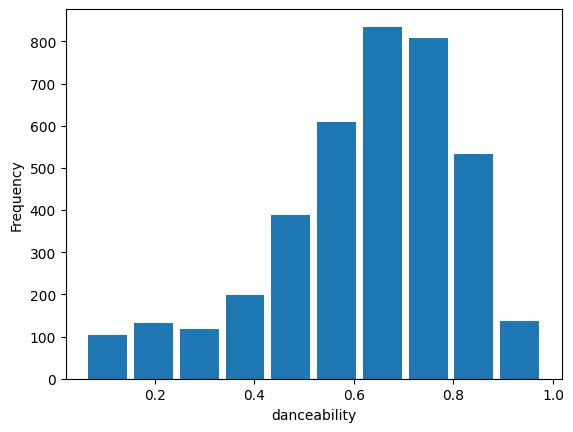

In [ ]:
plt.hist(x=X_train["danceability"], bins=10, rwidth=0.85)
plt.xlabel('danceability', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

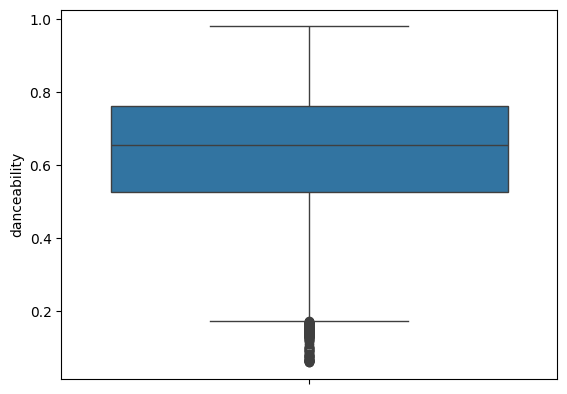

In [ ]:
sns.boxplot(data=X_train["danceability"])
plt.show()

In [ ]:
# fit on training data
train_winsorized = winsorize(X_train['danceability'], limits=[0.05, 0.05])

lower_bound = np.percentile(X_train['danceability'], 5)
upper_bound = np.percentile(X_train['danceability'], 95)
X_test_winsorized = X_test['danceability'].clip(lower=lower_bound, upper=upper_bound)

# replace the columns
X_train['danceability'] = train_winsorized
X_test['danceability'] = X_test_winsorized

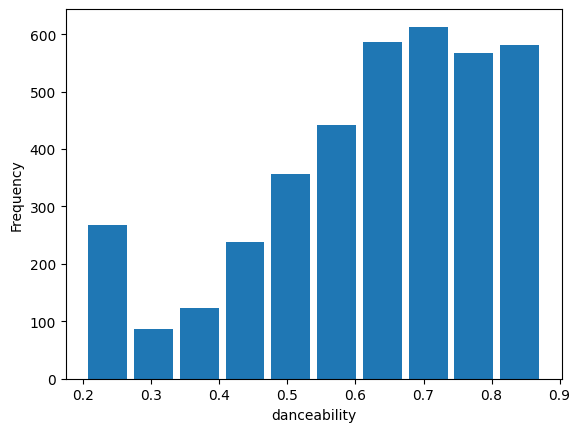

In [ ]:
plt.hist(x=X_train["danceability"], bins=10, rwidth=0.85)
plt.xlabel('danceability', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

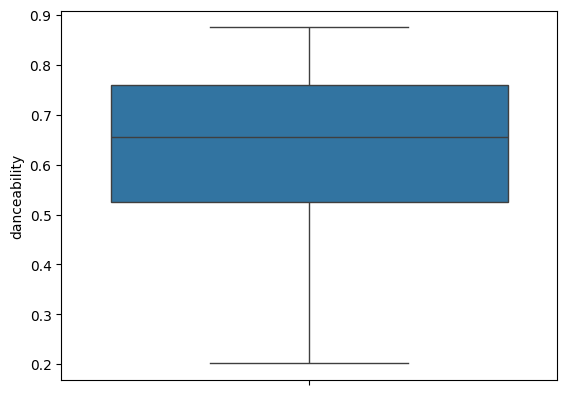

In [ ]:
sns.boxplot(data=X_train["danceability"])
plt.show()

Loudness

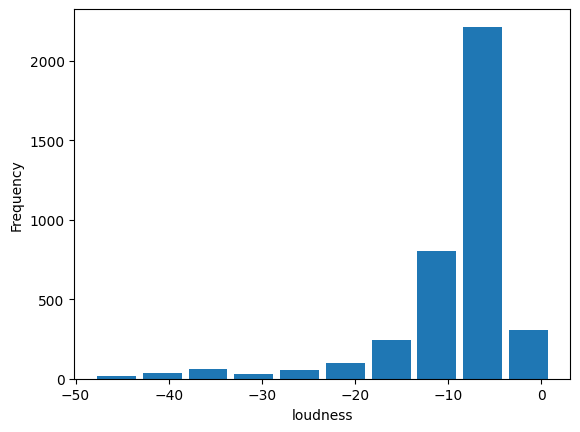

In [ ]:
plt.hist(x=X_train["loudness"], bins=10, rwidth=0.85)
plt.xlabel('loudness', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

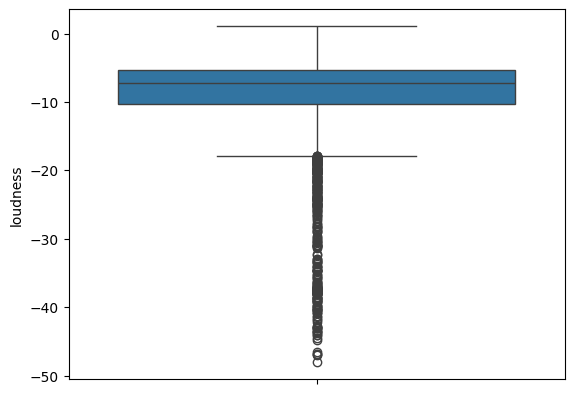

In [ ]:
sns.boxplot(data=X_train["loudness"])
plt.show()

In [ ]:
# fit on training data
train_winsorized = winsorize(X_train['loudness'], limits=[0.05, 0.05])

lower_bound = np.percentile(X_train['loudness'], 5)
upper_bound = np.percentile(X_train['loudness'], 95)
X_test_winsorized = X_test['loudness'].clip(lower=lower_bound, upper=upper_bound)

# replace the columns
X_train['loudness'] = train_winsorized
X_test['loudness'] = X_test_winsorized

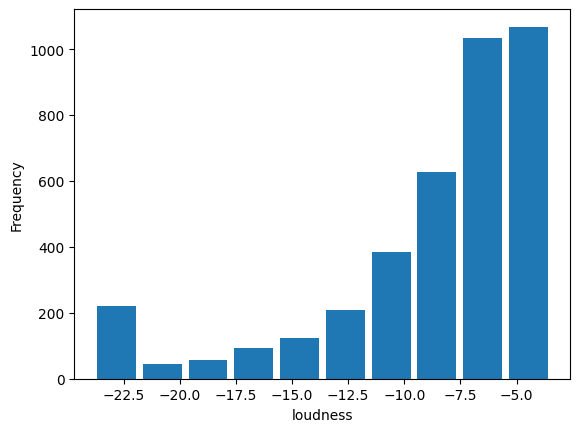

In [ ]:
plt.hist(x=X_train["loudness"], bins=10, rwidth=0.85)
plt.xlabel('loudness', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

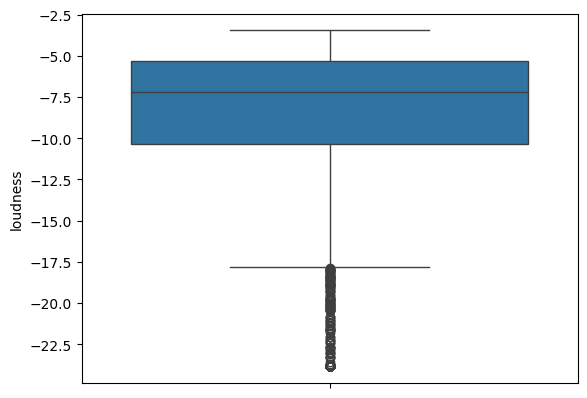

In [ ]:
sns.boxplot(data=X_train["loudness"])
plt.show()

# **Pre-processing**

## **Dismissed - Label Encoding**

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [ ]:
# X_train["playlist_genre"] = le.fit_transform(X_train["playlist_genre"])
# X_train.head()

In [ ]:
# X_train["playlist_genre"].head()

In [ ]:
# X_train["playlist_subgenre"] = le.fit_transform(X_train["playlist_subgenre"])
# X_train.head()

In [ ]:
# X_train["playlist_subgenre"].head()

In [ ]:
# X_test["playlist_genre"] = le.transform(X_test["playlist_genre"])
# X_test.head()

In [ ]:
# X_test["playlist_subgenre"] = le.transform(X_test["playlist_subgenre"])
# X_test.head()

## **Ordinal Encoding**

In [ ]:
ord_enc = OrdinalEncoder(unseen='encode', encoding_method='arbitrary')

X_train['playlist_genre'] = ord_enc.fit_transform(X_train[['playlist_genre']])
X_train['playlist_genre'].head()

3649    0
4106    1
3814    2
535     3
2638    4
Name: playlist_genre, dtype: int64

In [ ]:
X_test['playlist_genre'] = ord_enc.transform(X_test[['playlist_genre']])
X_test['playlist_genre'].head()

746     13
1550    24
4529     3
3749    14
3848     1
Name: playlist_genre, dtype: int64

In [ ]:
X_train['playlist_subgenre'] = ord_enc.fit_transform(X_train[['playlist_subgenre']])
X_train['playlist_subgenre'].head()

3649    0
4106    1
3814    0
535     2
2638    3
Name: playlist_subgenre, dtype: int64

In [ ]:
X_test['playlist_subgenre'] = ord_enc.transform(X_test[['playlist_subgenre']])
X_test['playlist_subgenre'].head()

746      0
1550    43
4529    25
3749    39
3848     9
Name: playlist_subgenre, dtype: int64

## **Handling imbalance**

In [ ]:
# checking imbalance in popular and less popular songs
training = pd.concat([X_train, y_train], axis=1)
training['popularity'].value_counts()

popularity
low     2504
high    1359
Name: count, dtype: int64

<Axes: xlabel='popularity', ylabel='count'>

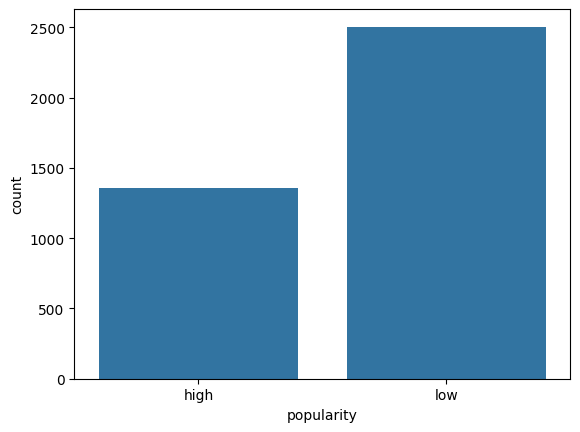

In [ ]:
sns.countplot(x='popularity', data=training)

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
training = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
training['popularity'].value_counts()

popularity
high    1359
low     1359
Name: count, dtype: int64

<Axes: xlabel='popularity', ylabel='count'>

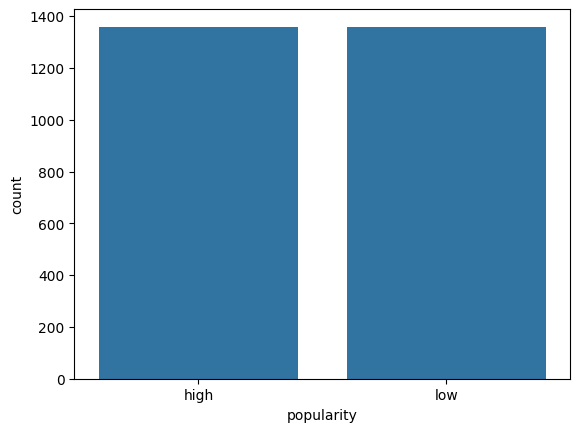

In [ ]:
sns.countplot(x='popularity', data=training)

In [ ]:
# split back into X_train and y_train
X_train = training.drop(columns=['popularity'])
y_train = training['popularity']

## **Feature correlation after pre-processing (but before scaling)**

In [ ]:
processed = pd.concat([X_train, y_train], axis=1)

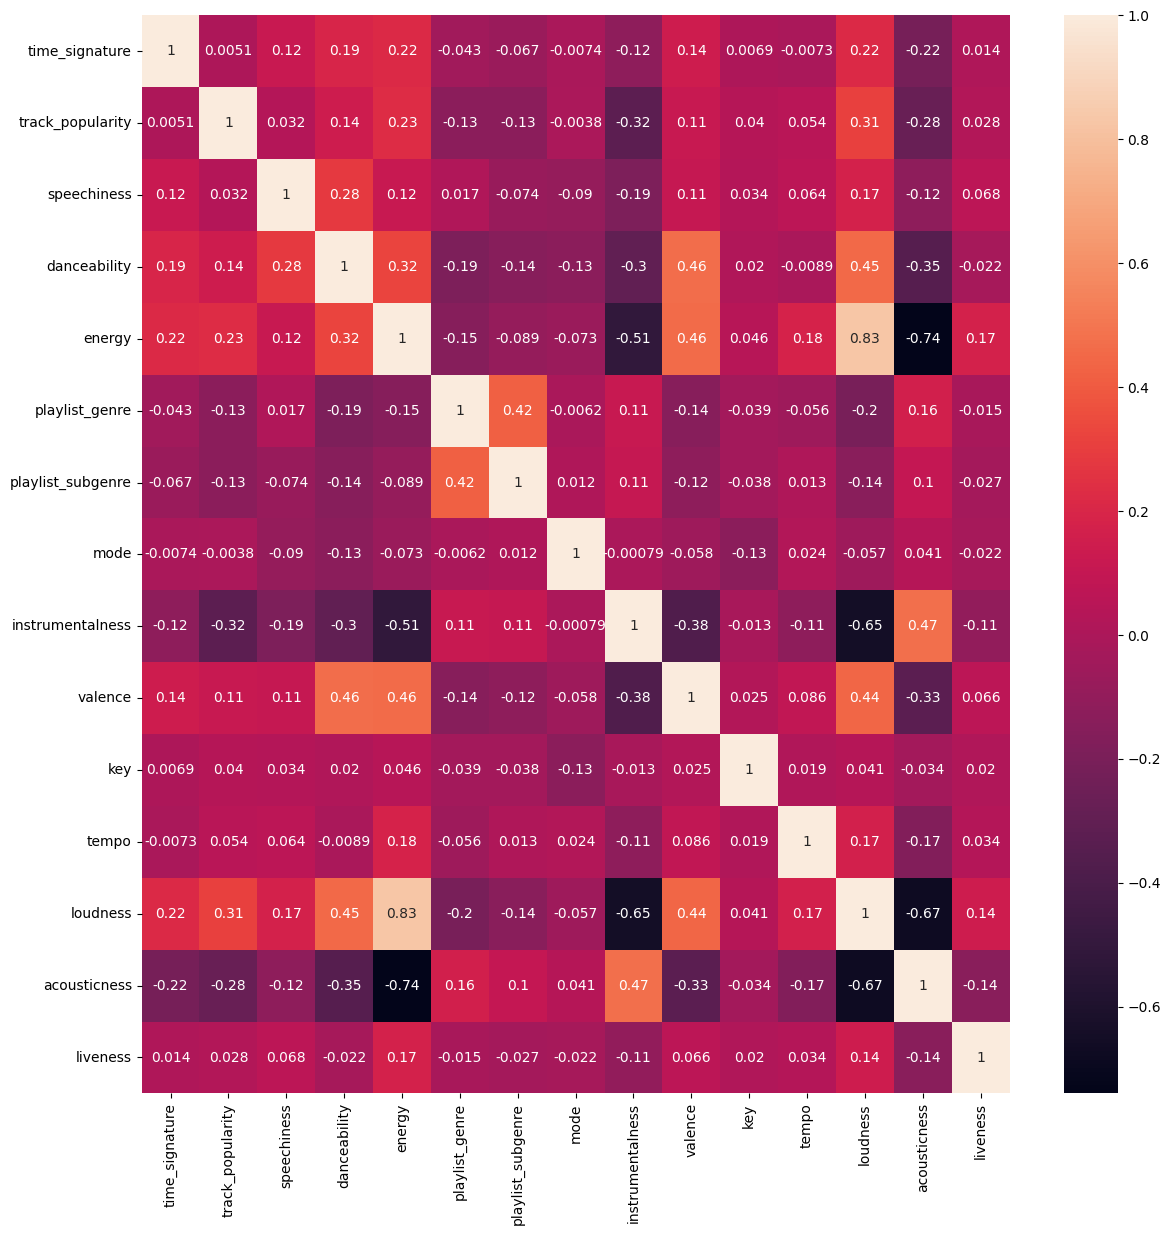

In [ ]:
numeric_df = processed.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)
plt.show()

## **Scaling for SVM and Logistic Regressor**

In [ ]:
# only scale non-categorical numeric features
features = [
    'track_popularity', 'speechiness', 'instrumentalness', 'tempo',
    'danceability', 'energy', 'loudness', 'valence'
]

scaler = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features)
    ],
    remainder='passthrough'
)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Results on seen data**

## **Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train, y_train)

dtc_train_pred = dtc.predict(X_train)

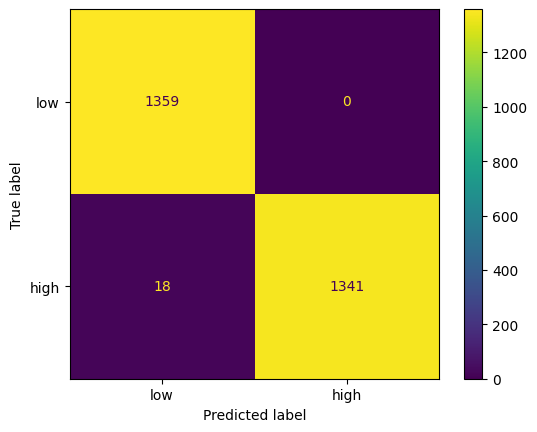

In [ ]:
dtc_cm = confusion_matrix(y_train, dtc_train_pred)

ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_train, dtc_train_pred)
print("Accuracy:", accuracy)

# pos_label='low' as sklearn's metric gets the precision for the 0 class rather than the 1 class
precision = precision_score(y_train, dtc_train_pred, pos_label='low')
print("Precision:", precision)

# pos_label='low' as sklearn's metric gets the recall for the 0 class rather than the 1 class
recall = recall_score(y_train, dtc_train_pred, pos_label='low')
print("Recall:", recall)

# pos_label='low' as sklearn's metric gets the f1 score for the 0 class rather than the 1 class
f1 = f1_score(y_train, dtc_train_pred, pos_label='low')
print("F1-Score:", f1)

Accuracy: 0.9933774834437086
Precision: 1.0
Recall: 0.9867549668874173
F1-Score: 0.9933333333333333


## **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)

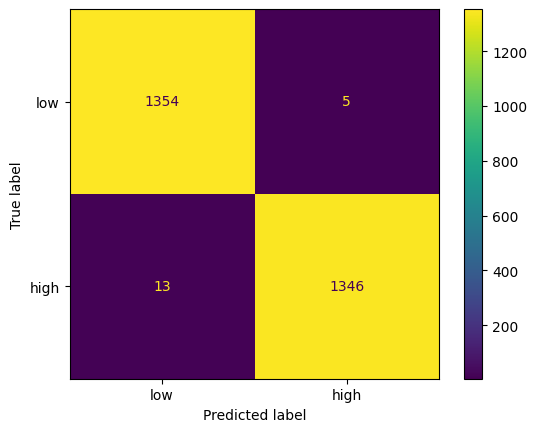

In [ ]:
rf_cm = confusion_matrix(y_train, rf_train_pred)

ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_train, rf_train_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_train, rf_train_pred, pos_label='low')
print("Precision:", precision)

recall = recall_score(y_train, rf_train_pred, pos_label='low')
print("Recall:", recall)

f1 = f1_score(y_train, rf_train_pred, pos_label='low')
print("F1-Score:", f1)

Accuracy: 0.9933774834437086
Precision: 0.996299037749815
Recall: 0.9904341427520236
F1-Score: 0.9933579335793358


## **Support Vector Machine**

In [ ]:
svm = svm.SVC(kernel='linear')

svm = svm.fit(X_train, y_train)

svm_train_pred = svm.predict(X_train)

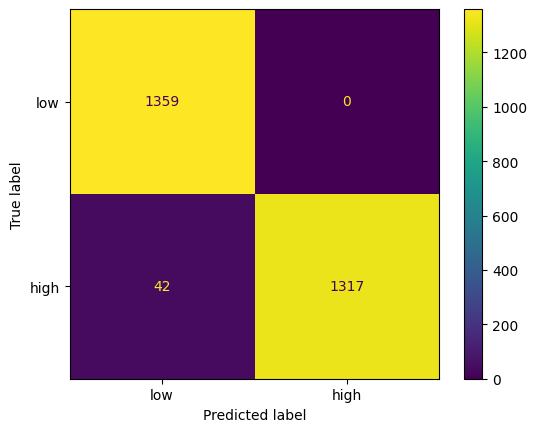

In [ ]:
svm_cm = confusion_matrix(y_train, svm_train_pred)

ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_train, svm_train_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_train, svm_train_pred, pos_label='low')
print("Precision:", precision)

recall = recall_score(y_train, svm_train_pred, pos_label='low')
print("Recall:", recall)

f1 = f1_score(y_train, svm_train_pred, pos_label='low')
print("F1-Score:", f1)

Accuracy: 0.9845474613686535
Precision: 1.0
Recall: 0.9690949227373068
F1-Score: 0.984304932735426


## **Logistic Regression**

In [ ]:
lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


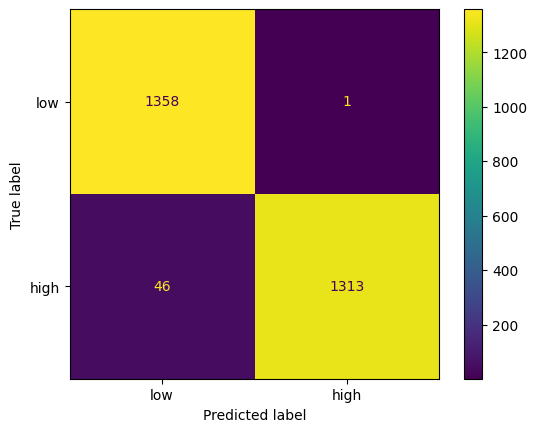

In [ ]:
lr_cm = confusion_matrix(y_train, lr_train_pred)

ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_train, lr_train_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_train, lr_train_pred, pos_label='low')
print("Precision:", precision)

recall = recall_score(y_train, lr_train_pred, pos_label='low')
print("Recall:", recall)

f1 = f1_score(y_train, lr_train_pred, pos_label='low')
print("F1-Score:", f1)

f1_new = 2 * ()

Accuracy: 0.9827078734363502
Precision: 0.9992389649923896
Recall: 0.9661515820456218
F1-Score: 0.9824167601945379


# **Results on unseen data**

## **Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train, y_train)

dtc_y_pred = dtc.predict(X_test)

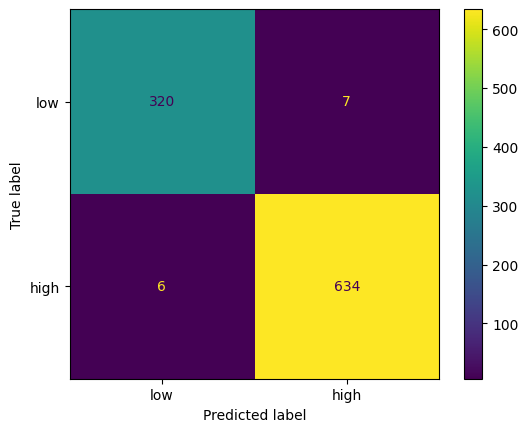

In [ ]:
dtc_cm = confusion_matrix(y_test, dtc_y_pred)

ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, dtc_y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, dtc_y_pred, pos_label='low')
print("Precision:", precision)

recall = recall_score(y_test, dtc_y_pred, pos_label='low')
print("Recall:", recall)

f1 = f1_score(y_test, dtc_y_pred, pos_label='low')
print("F1-Score:", f1)

Accuracy: 0.9865563598759048
Precision: 0.9890795631825273
Recall: 0.990625
F1-Score: 0.9898516783762685


## **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

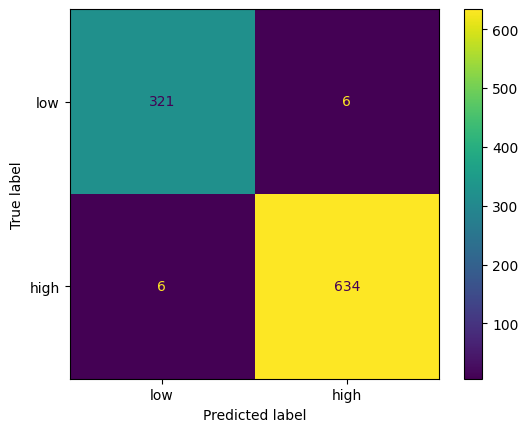

In [ ]:
rf_cm = confusion_matrix(y_test, rf_y_pred)

ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, rf_y_pred, pos_label='low')
print("Precision:", precision)

recall = recall_score(y_test, rf_y_pred, pos_label='low')
print("Recall:", recall)

f1 = f1_score(y_test, rf_y_pred, pos_label='low')
print("F1-Score:", f1)

Accuracy: 0.9875904860392968
Precision: 0.990625
Recall: 0.990625
F1-Score: 0.990625


## **Support Vector Machine**

In [ ]:
svm.fit(X_train, y_train)

svm_y_pred = svm.predict(X_test)

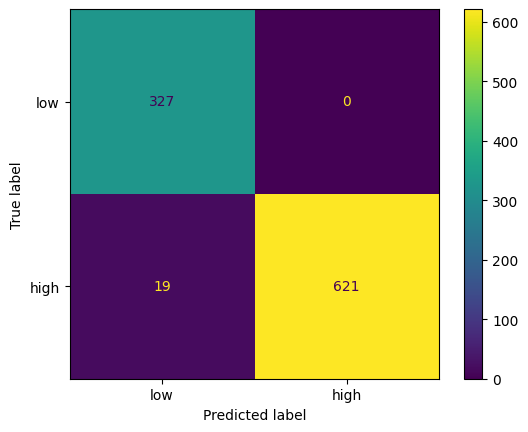

In [ ]:
svm_cm = confusion_matrix(y_test, svm_y_pred)

ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, svm_y_pred, pos_label='low')
print("Precision:", precision)

recall = recall_score(y_test, svm_y_pred, pos_label='low')
print("Recall:", recall)

f1 = f1_score(y_test, svm_y_pred, pos_label='low')
print("F1-Score:", f1)

Accuracy: 0.9803516028955532
Precision: 1.0
Recall: 0.9703125
F1-Score: 0.9849325931800159


## **Logistic Regression**

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


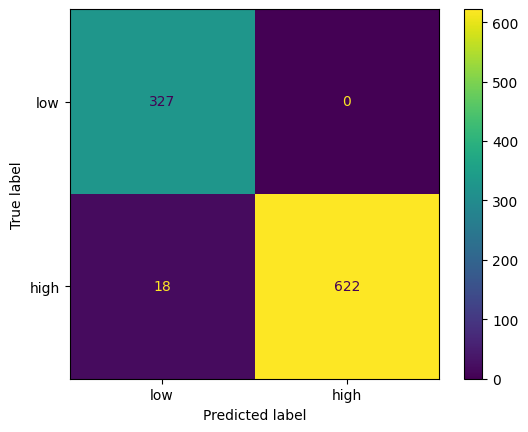

In [ ]:
lr_cm = confusion_matrix(y_test, lr_y_pred)

ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, lr_y_pred, pos_label='low')
print("Precision:", precision)

recall = recall_score(y_test, lr_y_pred, pos_label='low')
print("Recall:", recall)

f1 = f1_score(y_test, lr_y_pred, pos_label='low')
print("F1-Score:", f1)

Accuracy: 0.9813857290589452
Precision: 1.0
Recall: 0.971875
F1-Score: 0.9857369255150554


## **Comparison**

In [ ]:
data = {
    'Model': ['Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree',
              'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
              'SVM', 'SVM', 'SVM', 'SVM',
              'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression'],

    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'] * 4,

    'Value': [98.55, 98.75, 99.01, 98.91,
              98.76, 99.06, 99.06, 99.06,
              98.04, 100.00, 97.03, 98.49,
              98.14, 100.00, 97.19, 98.57]
}

df_metrics = pd.DataFrame(data)

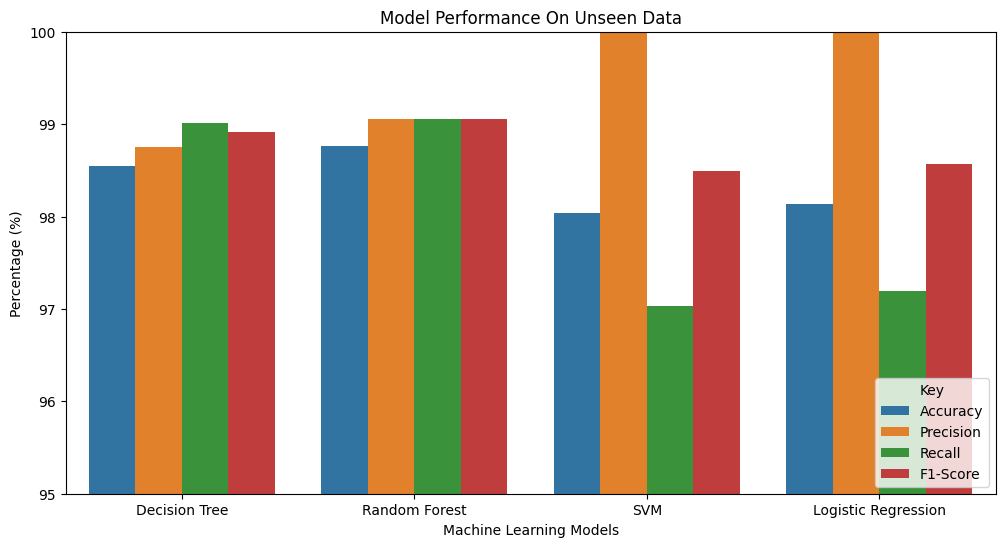

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_metrics,
    x='Model',
    y='Value',
    hue='Metric'
)

plt.title('Model Performance On Unseen Data')
plt.ylabel('Percentage (%)')
plt.xlabel('Machine Learning Models')
plt.ylim(95, 100)
plt.legend(title='Key', loc='lower right')

plt.show()

# **Hyperparameter tuning**

## **Decision Tree Classifier**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10, 15, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20, 30, None]
}

In [ ]:
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
final_model = DecisionTreeClassifier(
  criterion = best_params['criterion'],
  splitter = best_params['splitter'],
  max_depth = best_params['max_depth'],
  max_features = best_params['max_features'],
  min_samples_split = best_params['min_samples_split'],
  min_samples_leaf = best_params['min_samples_leaf'],
  max_leaf_nodes = best_params['max_leaf_nodes']
)

final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)

In [ ]:
final_model_y_pred = final_model.predict(X_test)

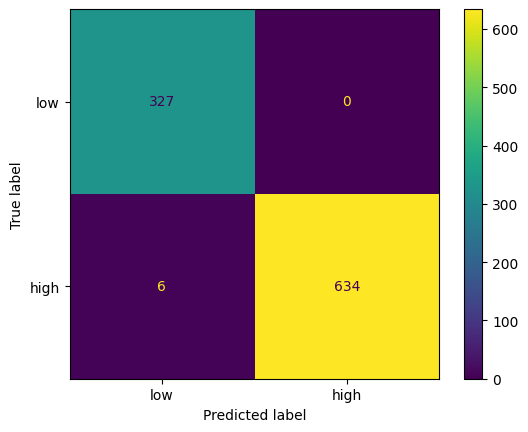

In [ ]:
final_model_cm = confusion_matrix(y_test, final_model_y_pred)

ConfusionMatrixDisplay(confusion_matrix=final_model_cm, display_labels=['low', 'high']).plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, final_model_y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, final_model_y_pred, pos_label='low')
print("Precision:", precision)

recall = recall_score(y_test, final_model_y_pred, pos_label='low')
print("Recall:", recall)

f1 = f1_score(y_test, final_model_y_pred, pos_label='low')
print("F1-Score:", f1)

Accuracy: 0.9937952430196484
Precision: 1.0
Recall: 0.990625
F1-Score: 0.9952904238618524
